In [307]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
# with open('./data/pi1/iperf0.json') as f:
#     data = json.load(f)
# load all the json files in the folder and iterate over them
import os
import glob
import re
import json
import statistics




In [308]:
# import json

# # # Load the JSON data
# # with open('test.json') as f:
# #     data = json.load(f)

# # Extract relevant data
# intervals = data['intervals']
# num_intervals = len(intervals)
# throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
# retransmits = [interval['sum']['retransmits'] for interval in intervals]
# rtts = [interval['streams'][0]['rtt'] for interval in intervals]
# cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
# rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
# reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# # Throughput Statistics
# print("Throughput Statistics (Mbps):")
# print(f"Mean Forward Throughput: {statistics.mean(throughputs):.2f}")
# print(f"Median Forward Throughput: {statistics.median(throughputs):.2f}")
# print(f"Max Forward Throughput: {max(throughputs):.2f}")
# print(f"Min Forward Throughput: {min(throughputs):.2f}")
# print(f"Standard Deviation Forward Throughput: {statistics.stdev(throughputs):.2f}")
# print(f"Mean Reverse Throughput: {statistics.mean(reverse_throughputs):.2f}")
# print(f"Median Reverse Throughput: {statistics.median(reverse_throughputs):.2f}")
# print(f"Max Reverse Throughput: {max(reverse_throughputs):.2f}")
# print(f"Min Reverse Throughput: {min(reverse_throughputs):.2f}")
# print(f"Standard Deviation Reverse Throughput: {statistics.stdev(reverse_throughputs):.2f}")

# # Retransmissions Statistics
# print("\nRetransmissions Statistics:")
# print(f"Total Retransmissions: {sum(retransmits)}")
# print(f"Mean Retransmissions per Interval: {statistics.mean(retransmits):.2f}")
# print(f"Median Retransmissions per Interval: {statistics.median(retransmits)}")
# print(f"Max Retransmissions in an Interval: {max(retransmits)}")
# print(f"Min Retransmissions in an Interval: {min(retransmits)}")

# # RTT Statistics
# print("\nRound-Trip Time (RTT) Statistics (μs):")
# print(f"Mean RTT: {statistics.mean(rtts):.2f}")
# print(f"Median RTT: {statistics.median(rtts):.2f}")
# print(f"Max RTT: {max(rtts):.2f}")
# print(f"Min RTT: {min(rtts):.2f}")
# print(f"Standard Deviation RTT: {statistics.stdev(rtts):.2f}")

# # Congestion Window Statistics
# print("\nCongestion Window (cwnd) Statistics (bytes):")
# print(f"Mean cwnd: {statistics.mean(cwnds):.2f}")
# print(f"Median cwnd: {statistics.median(cwnds):.2f}")
# print(f"Max cwnd: {max(cwnds):.2f}")
# print(f"Min cwnd: {min(cwnds):.2f}")
# print(f"Standard Deviation cwnd: {statistics.stdev(cwnds):.2f}")

# # Receiver Window Statistics
# print("\nReceiver Window (rwnd) Statistics (bytes):")
# print(f"Mean rwnd: {statistics.mean(rwnds):.2f}")
# print(f"Median rwnd: {statistics.median(rwnds):.2f}")
# print(f"Max rwnd: {max(rwnds):.2f}")
# print(f"Min rwnd: {min(rwnds):.2f}")
# print(f"Standard Deviation rwnd: {statistics.stdev(rwnds):.2f}")

In [309]:
# import json
# import statistics
# import matplotlib.pyplot as plt

# # # Load the JSON data
# # with open('test.json') as f:
# #     data = json.load(f)

# # Extract relevant data
# intervals = data['intervals']
# num_intervals = len(intervals)
# throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
# retransmits = [interval['sum']['retransmits'] for interval in intervals]
# rtts = [interval['streams'][0]['rtt'] for interval in intervals]
# cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
# rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
# reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# # Throughput Statistics
# throughput_stats = [
#     statistics.mean(throughputs),
#     statistics.median(throughputs),
#     max(throughputs),
#     min(throughputs),
#     statistics.stdev(throughputs),
#     statistics.mean(reverse_throughputs),
#     statistics.median(reverse_throughputs),
#     max(reverse_throughputs),
#     min(reverse_throughputs),
#     statistics.stdev(reverse_throughputs)
# ]

# plt.figure(figsize=(12, 6))
# # title the graph to use the curerent data
# plt.title('Throughput of data from' + filename)
# plt.bar(range(len(throughput_stats)), throughput_stats)
# plt.xticks(range(len(throughput_stats)), ['Mean Forward', 'Median Forward', 'Max Forward', 'Min Forward', 'Std Dev Forward', 'Mean Reverse', 'Median Reverse', 'Max Reverse', 'Min Reverse', 'Std Dev Reverse'], rotation=45)
# plt.xlabel('Throughput Statistics (Mbps)')
# plt.ylabel('Value')
# plt.title('Throughput Statistics')
# plt.show()

# # Retransmissions Statistics
# retransmit_stats = [
#     sum(retransmits),
#     statistics.mean(retransmits),
#     statistics.median(retransmits),
#     max(retransmits),
#     min(retransmits)
# ]

# plt.figure(figsize=(12, 6))
# plt.bar(range(len(retransmit_stats)), retransmit_stats)
# plt.xticks(range(len(retransmit_stats)), ['Total', 'Mean', 'Median', 'Max', 'Min'], rotation=45)
# plt.xlabel('Retransmissions Statistics')
# plt.ylabel('Value')
# plt.title('Retransmissions Statistics')
# plt.show()

# # RTT Statistics
# rtt_stats = [
#     statistics.mean(rtts),
#     statistics.median(rtts),
#     max(rtts),
#     min(rtts),
#     statistics.stdev(rtts)
# ]

# plt.figure(figsize=(12, 6))
# plt.bar(range(len(rtt_stats)), rtt_stats)
# plt.xticks(range(len(rtt_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
# plt.xlabel('RTT Statistics (μs)')
# plt.ylabel('Value')
# plt.title('RTT Statistics')
# plt.show()

# # Congestion Window Statistics
# cwnd_stats = [
#     statistics.mean(cwnds),
#     statistics.median(cwnds),
#     max(cwnds),
#     min(cwnds),
#     statistics.stdev(cwnds)
# ]

# plt.figure(figsize=(12, 6))
# plt.bar(range(len(cwnd_stats)), cwnd_stats)
# plt.xticks(range(len(cwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
# plt.xlabel('Congestion Window Statistics (bytes)')
# plt.ylabel('Value')
# plt.title('Congestion Window Statistics')
# plt.show()

# # Receiver Window Statistics
# rwnd_stats = [
#     statistics.mean(rwnds),
#     statistics.median(rwnds),
#     max(rwnds),
#     min(rwnds),
#     statistics.stdev(rwnds)
# ]

# plt.figure(figsize=(12, 6))
# plt.bar(range(len(rwnd_stats)), rwnd_stats)
# plt.xticks(range(len(rwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
# plt.xlabel('Receiver Window Statistics (bytes)')
# plt.ylabel('Value')
# plt.title('Receiver Window Statistics')
# plt.show()

total retransmits: 16


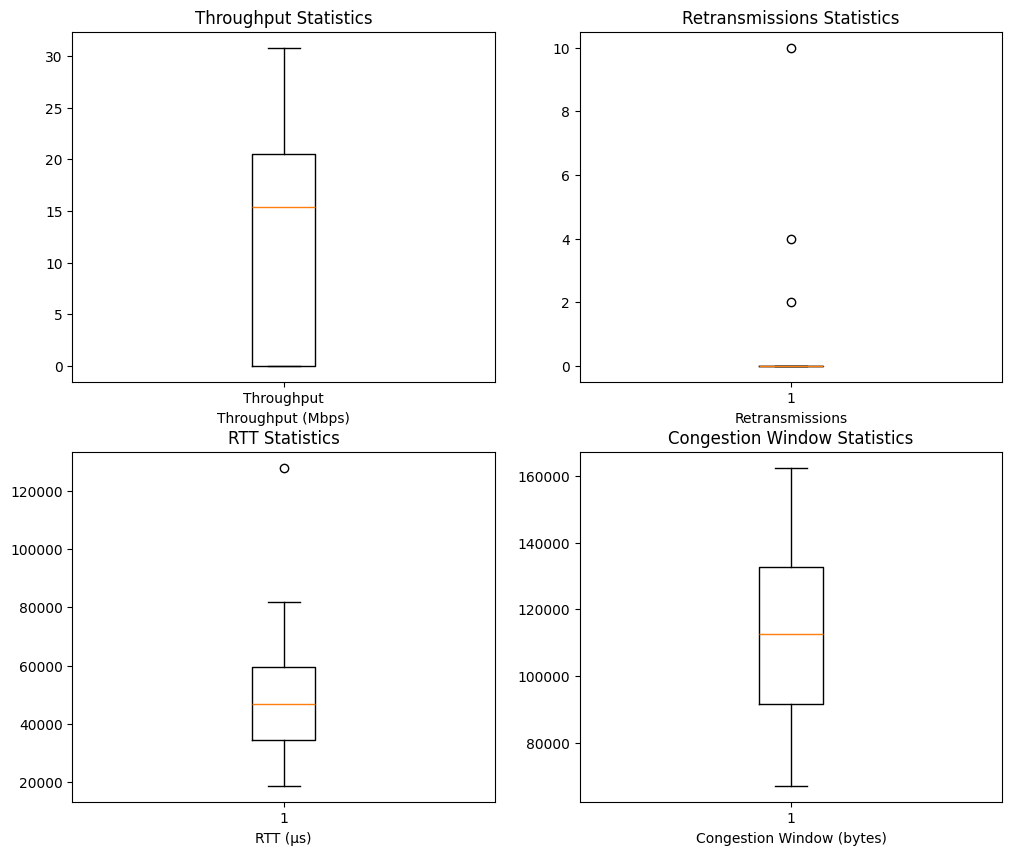

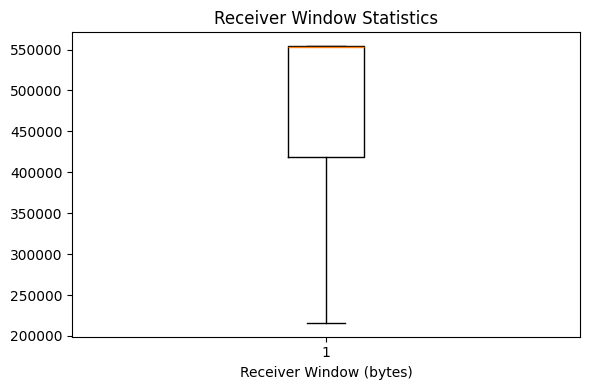

In [28]:
import json
import statistics
import matplotlib.pyplot as plt

# Load the JSON data
with open('./finalized_data_mobile/BATMAN/LINE/3/pi4/iperf0.json') as f:
    data = json.load(f)

# go through all the files, and calculate the average retransmits
retransmits = []
for filename in glob.glob('./finalized_data_mobile/BATMAN/LINE/3/pi4/*.json'):
    with  open(filename) as f:
        data = json.load(f)
        retransmits.append(data['end']['sum_sent']['retransmits'])
# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
retransmits = [interval['sum']['retransmits'] for interval in intervals]
print("total retransmits:", data['end']['sum_sent']['retransmits'])
# reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [throughputs]
throughput_labels = ['Throughput']

# plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.boxplot(throughput_stats, labels=throughput_labels)
plt.xlabel('Throughput (Mbps)')
plt.title('Throughput Statistics')
# plt.show()

# Retransmissions Statistics
# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
plt.boxplot(retransmits)
plt.xlabel('Retransmissions')
plt.title('Retransmissions Statistics')
# plt.show()

# RTT Statistics
# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.boxplot(rtts)
plt.xlabel('RTT (μs)')
plt.title('RTT Statistics')
# plt.show()

# Congestion Window Statistics
# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
plt.boxplot(cwnds)
plt.xlabel('Congestion Window (bytes)')
plt.title('Congestion Window Statistics')
# plt.show()

# Receiver Window Statistics
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(6, 4))

plt.boxplot(rwnds)
plt.xlabel('Receiver Window (bytes)')
plt.title('Receiver Window Statistics')
# plt.show()
plt.tight_layout()
plt.show()

In [ ]:
# import json
# import statistics
# import matplotlib.pyplot as plt

# # # Load the JSON data
# # with open('test.json') as f:
# #     data = json.load(f)

# # Extract relevant data
# intervals = data['intervals']
# num_intervals = len(intervals)
# timestamps = [interval['sum']['end'] for interval in intervals]
# throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
# reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
# rtts = [interval['streams'][0]['rtt'] for interval in intervals]
# jitters = [interval['streams'][0]['rttvar'] for interval in intervals]

# # Latency (RTT)
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, rtts)
# plt.xlabel('Time (s)')
# plt.ylabel('RTT (μs)')
# plt.title('Latency (Round-Trip Time)')
# plt.show()

# # Throughput
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, throughputs, label='Forward Throughput')
# plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
# plt.xlabel('Time (s)')
# plt.ylabel('Throughput (Mbps)')
# plt.title('Throughput')
# plt.legend()
# plt.show()

# # Jitter
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, jitters)
# plt.xlabel('Time (s)')
# plt.ylabel('Jitter (μs)')
# plt.title('Jitter')
# plt.show()

# # Connectivity
# connected_hosts = set()
# for interval in data['intervals']:
#     for stream in interval['streams']:
#         if 'local_host' in stream and 'remote_host' in stream:
#             connected_hosts.add((stream['local_host'], stream['remote_host']))

# print("Connected Hosts:")
# for local_host, remote_host in connected_hosts:
#     print(f"Local Host: {local_host}, Remote Host: {remote_host}")

# draw topology

In [310]:
# import json

# def read_batman_topology(file_path):
#     try:
#         with open(file_path, 'r') as file:
#             data = json.load(file)
#             return data
#     except FileNotFoundError:
#         print("File not found.")
#         return None
#     except json.JSONDecodeError:
#         print("Invalid JSON format.")
#         return None

# # Example usage:
# file_path = './topology.json'
# batman_topology = read_batman_topology(file_path)
# if batman_topology:
#     print("BATMAN Topology:")
#     print(batman_topology)


In [311]:
# import json
# import networkx as nx
# import matplotlib.pyplot as plt

# def read_batman_topology(file_path):
#     try:
#         with open(file_path, 'r') as file:
#             data = json.load(file)
#             return data
#     except FileNotFoundError:
#         print("File not found.")
#         return None
#     except json.JSONDecodeError:
#         print("Invalid JSON format.")
#         return None

# def draw_batman_topology(batman_topology, mac_to_name):
#     # Create a directed graph
#     G = nx.DiGraph()

#     # Add nodes for primary router and clients
#     primary_router = batman_topology['vis'][0]['primary']
#     clients = batman_topology['vis'][0]['clients']
#     G.add_node(primary_router, type='router', label=mac_to_name.get(primary_router, 'Pi0'))
#     # for client in clients:
#         # G.add_node(client, type='client', label=mac_to_name.get(client, 'Client'))

#     # Add edges for neighbors with their metrics
#     neighbors = batman_topology['vis'][0]['neighbors']
#     for neighbor in neighbors:
#         router = neighbor['router']
#         neighbor_mac = neighbor['neighbor']
#         metric = float(neighbor['metric'])
#         G.add_node(neighbor_mac, type='router', label=f"{mac_to_name.get(neighbor_mac, 'Neighbor')} ({metric})")
#         G.add_edge(router, neighbor_mac)

#     # Draw the graph
#     pos = nx.spring_layout(G)  # Set positions of nodes
#     node_labels = nx.get_node_attributes(G, 'label')

#     # Draw nodes as rectangles (squares)
#     nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_shape='s', node_size=3000)
#     nx.draw_networkx_labels(G, pos, labels=node_labels)
#     nx.draw_networkx_edges(G, pos)

#     plt.title('BATMAN-adv Network Topology')
#     plt.axis('off')  # Turn off axis
#     plt.show()

# # Mapping of MAC addresses to names
# mac_to_name = {
#     '2c:cf:67:26:66:d0': 'pi4',
#     '2c:cf:67:26:66:49': 'pi2',
#     '2c:cf:67:26:66:3a': 'pi5',
#     'd8:3a:dd:f5:1f:14': 'pi1',
#     '2c:cf:67:26:66:51': 'pi3'
# }

# # Example usage:
# file_path = './topology.json'
# batman_topology = read_batman_topology(file_path)
# if batman_topology:
#     draw_batman_topology(batman_topology, mac_to_name)

#     # Example usage:
# file_path = './topology2.json'
# batman_topology = read_batman_topology(file_path)
# if batman_topology:
#     draw_batman_topology(batman_topology, mac_to_name)


# Parse Ping Data

In [312]:


# reference_string = '''
#  172.27.0.1 
# 172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1
# 172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089
# 172.27.0.2 : xmt/rcv/%loss = 5/0/100%
# 172.27.0.3 : xmt/rcv/%loss = 5/0/100%
# 172.27.0.4 : xmt/rcv/%loss = 5/0/100%
# 172.27.0.5 : xmt/rcv/%loss = 5/0/100%
# '''
# print("REFERENCE")
# print(reference_string)

# data = reference_string.split("\n")[2:]
# print(data)
# # get unique ip addresses 
# ips = set()
# for i in range(len(data)):
#     if len(data[i]) > 0:
#         ips.add(data[i].split()[0])

# print("DATA: ", data)
# # remove empty strings
# for i in range(len(data)):
#     if len(data[i]) == 0:
#         data.pop(i)
# for d in data: 
#     ip,xmt,rcv,loss,min,avg,max =None, None, None, None, None, None, None
#     # fill array with -1 
#     populated_arr = [-1,-1,-1,-1,-1,-1,-1]
#     d = d.strip()
#     # remove all spaces
#     d = d.replace(" ", "")
#     # if " min/avg/max = " in d:
#     d = d.replace ("min/avg/max=", "")
#     d = d.replace("%", "")
#     d=d.replace(":", "")
#     d = d.replace("xmt/rcv/loss=", ",")
#     d = d.replace("/", ",") 
#     d = d.split(",")
#     for i in range(len(d)):
#         populated_arr[i] = d[i]
#     print(populated_arr)
    






# Data collection methodology & plan

In [ ]:
# data collected from fping:
# 172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.099/0.111/0.134
# xmt is the number of packets sent
# rcv is the number of packets received
# loss is the percentage of packets lost
# min is the minimum round-trip time (RTT) in milliseconds
# avg is the average RTT in milliseconds
# max is the maximum RTT in milliseconds





# Fully connected: every node is connected to every other node
# Star: all nodes are connected to a central node
# Pairs: two nodes will move together(simulating fire fighters moving in pairs)
# We will examine static and dynamic topologies

# for [STATIC, DYNAMIC]: ## Analyze the impact of mobility on performance
    # for [BATMAN, and OLSR]: ## Compare the performance of BATMAN and OLSR
        # for [MESH, LINE, PAIRS]: ## Analyze the impact of network topology on performance
            # for [3, 5 NODES]: ## Analyze Scalability 
                # 1. Collect data from fping and iperf
                    # - fping: min, max, avg round-trip time (RTT) and packet loss to each node in the network
                    # - iperf: throughput, rtx, RTT, congestion window, receiver window, CPU utilization to the base station, bandiwdth, jitter(rtt variance)
                # 2. Visualize the data using plots
                # 3. Calculate the following statistics:
                    # - Mean, Median, Max, Min, Standard Deviation for each metric
                    # - Box plots for each metric
                    # - CDF for each metric
                    # - Connectivity: which nodes are connected to which other nodes
    
    # new tesT: long term performance of the network
    # 1. Run iperf for an extended period of time    
    # 4. Visualize the network topology using the BATMAN-adv data
    # 5. Compare the performance of BATMAN-adv and OLSR
    # 6. Analyze the impact of network topology on performance
#  Analyze scalability 
# in real world networks, the topology rapidly changes, so by examing the performance of different routing protocols under different static topologies, we can gain insights into how they perform in real-world scenarios.
# we can examine how each topology migra

# using this data, we can calculate the following:


# ping data to every other node. 

# methodology: setting up a simple benchmark that performs back to back rtt measurements by sending and recieving 20 byte requsts and replies from the server 
# cdf of the mesarued rtts from the pixel to the linksys
# talk about complexities of not using iperf with several ports because of collisions 

## Data Initialization

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# # List all JSON files in the current directory
# json_files = [f for f in os.listdir('./data/pi1/') if f.endswith('.json') and "perf" in f]
# more = [f for f in os.listdir('./data/pi2/') if f.endswith('.json') and "fping" in f]
# for m in more:
#     json_files.append(m)

# CDF Plotting, making this for longer iperf tests

# Ping Data Analytics Attempt #1

# Ping Data Analytics Attempt #2

Processing data in: ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2


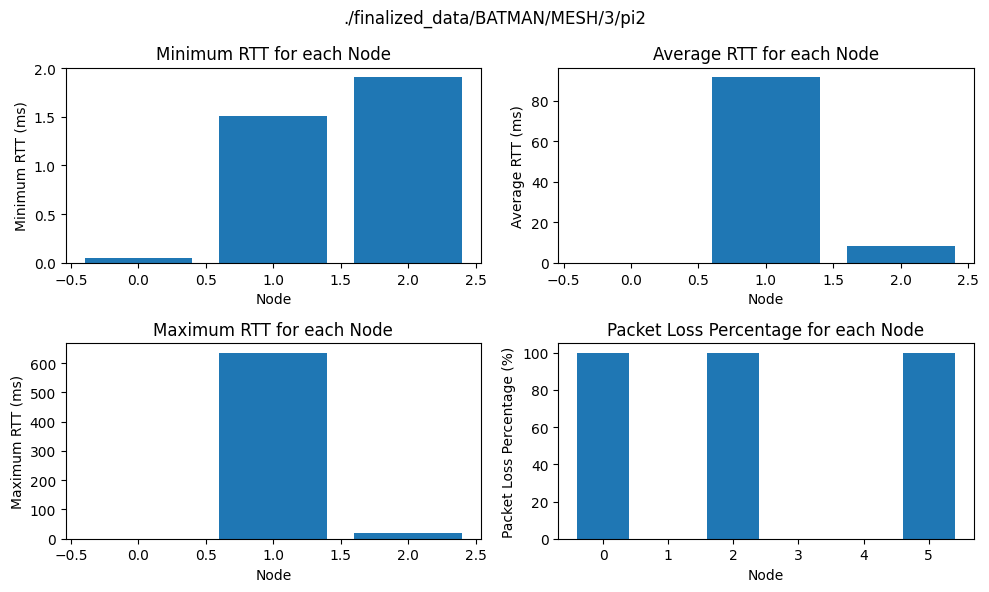

RTT Statistics for Ping Data:
Mean - Minimum RTT: 1.1576666666666666
Mean - Average RTT: 33.43233333333333
Mean - Maximum RTT: 218.28666666666663
Mean - Packet Loss Percentage: 50.0
Median - Minimum RTT: 1.51
Median - Average RTT: 8.44
Median - Maximum RTT: 19.8
Median - Packet Loss Percentage: 50.0
Processing data in: ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2


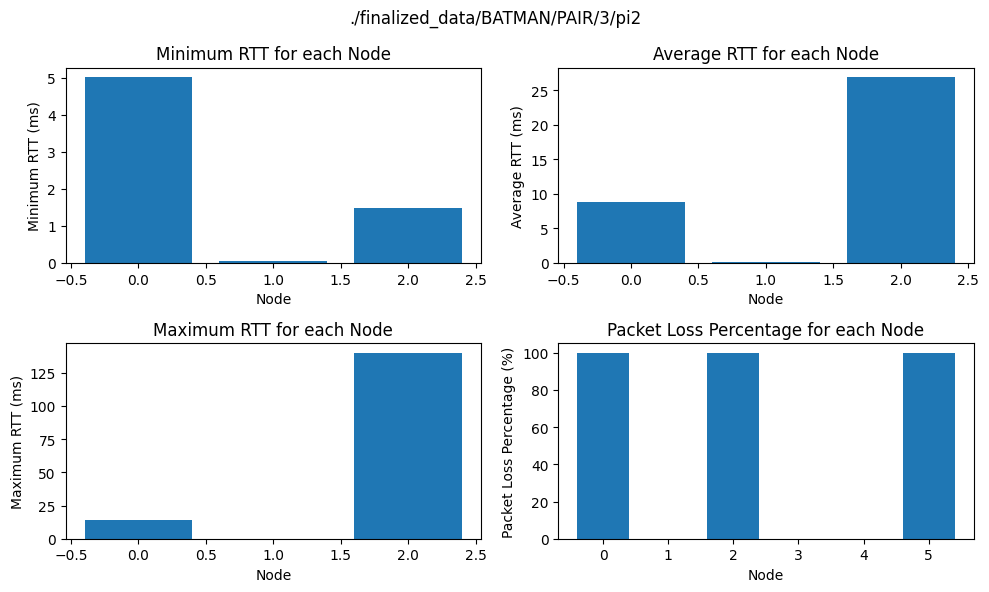

RTT Statistics for Ping Data:
Mean - Minimum RTT: 2.1839999999999997
Mean - Average RTT: 11.924999999999999
Mean - Maximum RTT: 51.35333333333333
Mean - Packet Loss Percentage: 50.0
Median - Minimum RTT: 1.48
Median - Average RTT: 8.82
Median - Maximum RTT: 14.0
Median - Packet Loss Percentage: 50.0
Processing data in: ./finalized_data/BATMAN/PAIR/6/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/6/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/6/pi2


In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to load data from JSON files
def load_data(folder_path):
    iperf_data = None
    ping_data = None
    for file in os.listdir(folder_path):
        print("searching for files in: ", folder_path)
        if file.startswith("iperf"):
            with open(os.path.join(folder_path, file), 'r') as f:
                iperf_data = json.load(f)
        elif file.startswith("ping"):
            with open(os.path.join(folder_path, file), 'r') as f:
                ping_data = json.load(f)
    return iperf_data, ping_data

# Function to visualize data
def visualize_data(ping_data, folder_path):
    # Plot ping metrics for each node
    ips = ping_data['ips']
    data = ping_data['data']

    # Extracting data
    min_rtts = []
    avg_rtts = []
    max_rtts = []
    packet_loss_percentages = []

    for ip in ips:
        ip_data = data[ip]
        packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

        if min_rtt != -1:
            min_rtts.append(float(min_rtt))
        if avg_rtt != -1:
            avg_rtts.append(float(avg_rtt))
        if max_rtt != -1:
            max_rtts.append(float(max_rtt))
        packet_loss_percentages.append(float(packet_loss))

    # Plotting
    plt.figure(figsize=(10, 6))
    # title it with the folder path
    plt.suptitle(folder_path)

    plt.subplot(2, 2, 1)
    plt.bar(range(len(min_rtts)), min_rtts)
    plt.xlabel('Node')
    plt.ylabel('Minimum RTT (ms)')
    plt.title('Minimum RTT for each Node')

    plt.subplot(2, 2, 2)
    plt.bar(range(len(avg_rtts)), avg_rtts)
    plt.xlabel('Node')
    plt.ylabel('Average RTT (ms)')
    plt.title('Average RTT for each Node')

    plt.subplot(2, 2, 3)
    plt.bar(range(len(max_rtts)), max_rtts)
    plt.xlabel('Node')
    plt.ylabel('Maximum RTT (ms)')
    plt.title('Maximum RTT for each Node')

    plt.subplot(2, 2, 4)
    plt.bar(range(len(packet_loss_percentages)), packet_loss_percentages)
    plt.xlabel('Node')
    plt.ylabel('Packet Loss Percentage (%)')
    plt.title('Packet Loss Percentage for each Node')

    plt.tight_layout()
    plt.show()

# Function to perform statistical analysis
def analyze_data(ping_data):
    # Extract ping data
    ips = ping_data['ips']
    data = ping_data['data']

    # Extracting data
    min_rtts = []
    avg_rtts = []
    max_rtts = []
    packet_loss_percentages = []

    for ip in ips:
        ip_data = data[ip]
        packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

        if min_rtt != -1:
            min_rtts.append(float(min_rtt))
        if avg_rtt != -1:
            avg_rtts.append(float(avg_rtt))
        if max_rtt != -1:
            max_rtts.append(float(max_rtt))
        packet_loss_percentages.append(float(packet_loss))

    # Calculate statistics
    min_rtt_mean = np.mean(min_rtts)
    avg_rtt_mean = np.mean(avg_rtts)
    max_rtt_mean = np.mean(max_rtts)
    packet_loss_mean = np.mean(packet_loss_percentages)

    min_rtt_median = np.median(min_rtts)
    avg_rtt_median = np.median(avg_rtts)
    max_rtt_median = np.median(max_rtts)
    packet_loss_median = np.median(packet_loss_percentages)

    print("RTT Statistics for Ping Data:")
    # print('STATS FOR PING DATA IN:', folder_path)
    print("Mean - Minimum RTT:", min_rtt_mean)
    print("Mean - Average RTT:", avg_rtt_mean)
    print("Mean - Maximum RTT:", max_rtt_mean)
    print("Mean - Packet Loss Percentage:", packet_loss_mean)
    print("Median - Minimum RTT:", min_rtt_median)
    print("Median - Average RTT:", avg_rtt_median)
    print("Median - Maximum RTT:", max_rtt_median)
    print("Median - Packet Loss Percentage:", packet_loss_median)

# # Main function
# def main(root_folder):
#     for mobility in ['STATIC', 'DYNAMIC']:
#         for routing_protocol in ['BATMAN', 'OLSR']:
#             for topology in ['STAR', 'LINE', 'PAIRS']:
#                 for num_nodes in ['3', '6']:
#                     folder_path = os.path.join(root_folder, mobility, routing_protocol, topology, num_nodes, 'PI2')
#                     if os.path.exists(folder_path):
#                         iperf_data, ping_data = load_data(folder_path)
#                         if iperf_data and ping_data:
#                             visualize_data(ping_data, folder_path)
#                             analyze_data(ping_data)

def main(root_folder):
    # for mobility in ['STATIC', 'DYNAMIC']:
        # for routing_protocol in ['BATMAN', 'OLSR']:
        for routing_protocol in ['BATMAN']:
            # for topology in ['LINE', 'MESH', 'PAIR']:
            for topology in ['MESH', 'PAIR']:
                for num_nodes in ['3', '6']:
                    # folder_path = os.path.join(root_folder, mobility, routing_protocol, topology, num_nodes, 'PI2')
                    folder_path = os.path.join(root_folder, routing_protocol, topology, num_nodes, 'pi2')
                    if os.path.exists(folder_path):
                        print("Processing data in:", folder_path)
                        iperf_data, ping_data = load_data(folder_path)
                        if iperf_data and ping_data:
                            visualize_data(ping_data, folder_path)

                            # visualize_data(iperf_data, ping_data, folder_path)
                            # analyze_data(iperf_data, ping_data)
                            analyze_data(ping_data)


# Define the root folder
# root_folder = 'STATIC'  # Change this to your root folder
root_folder = './finalized_data/'  # Change this to your root folder

# Call the main function
main(root_folder)


# Ping Data Analytics Attempt #3

In [ ]:
def visualize_data(folder_paths):
    # Iterate through each folder path
    for folder_path in folder_paths:
        # Plot ping metrics for each node
        iperf_data, ping_data = load_data(folder_path)
        if iperf_data and ping_data:
            ips = ping_data['ips']
            data = ping_data['data']

            # Extracting data
            min_rtts = []
            avg_rtts = []
            max_rtts = []
            packet_loss_percentages = []

            for ip in ips:
                ip_data = data[ip]
                packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

                if min_rtt != -1:
                    min_rtts.append(float(min_rtt))
                if avg_rtt != -1:
                    avg_rtts.append(float(avg_rtt))
                if max_rtt != -1:
                    max_rtts.append(float(max_rtt))
                packet_loss_percentages.append(float(packet_loss))

            # Plotting
            plt.figure(figsize=(10, 6))

            plt.subplot(2, 2, 1)
            plt.bar(range(len(min_rtts)), min_rtts)
            plt.xlabel('Node')
            plt.ylabel('Minimum RTT (ms)')
            plt.title('Minimum RTT for each Node')

            plt.subplot(2, 2, 2)
            plt.bar(range(len(avg_rtts)), avg_rtts)
            plt.xlabel('Node')
            plt.ylabel('Average RTT (ms)')
            plt.title('Average RTT for each Node')

            plt.subplot(2, 2, 3)
            plt.bar(range(len(max_rtts)), max_rtts)
            plt.xlabel('Node')
            plt.ylabel('Maximum RTT (ms)')
            plt.title('Maximum RTT for each Node')

            plt.subplot(2, 2, 4)
            plt.bar(range(len(packet_loss_percentages)), packet_loss_percentages)
            plt.xlabel('Node')
            plt.ylabel('Packet Loss Percentage (%)')
            plt.title('Packet Loss Percentage for each Node')

            plt.tight_layout()
            plt.show()

def main(root_folder):
    # for mobility in ['STATIC', 'DYNAMIC']:
        for routing_protocol in ['BATMAN', 'OLSR']:
            for topology in ['STAR', 'LINE', 'PAIRS']:
                for num_nodes in ['3', '6']:
                    folder_paths = [
                        os.path.join(root_folder,  routing_protocol, topology, num_nodes, 'pi2'),
                        os.path.join(root_folder,  routing_protocol, topology, num_nodes, 'pi3')
                    ]
                    for folder_path in folder_paths:
                        if os.path.exists(folder_path):
                            print("Processing data in:", folder_path)
                            visualize_data(folder_paths)

# Define the root folder
root_folder = './finalized_data/'

# Call the main function
main(root_folder)


searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/OLSR/MESH/3/pi2
searching for files in:  ./finalized_data/OLSR/MESH/3/pi2
searching for files in:  ./finalized_data/OLSR/MESH/3/pi2
searching for files in:  ./finalized_data/OLSR/MESH/3/pi2


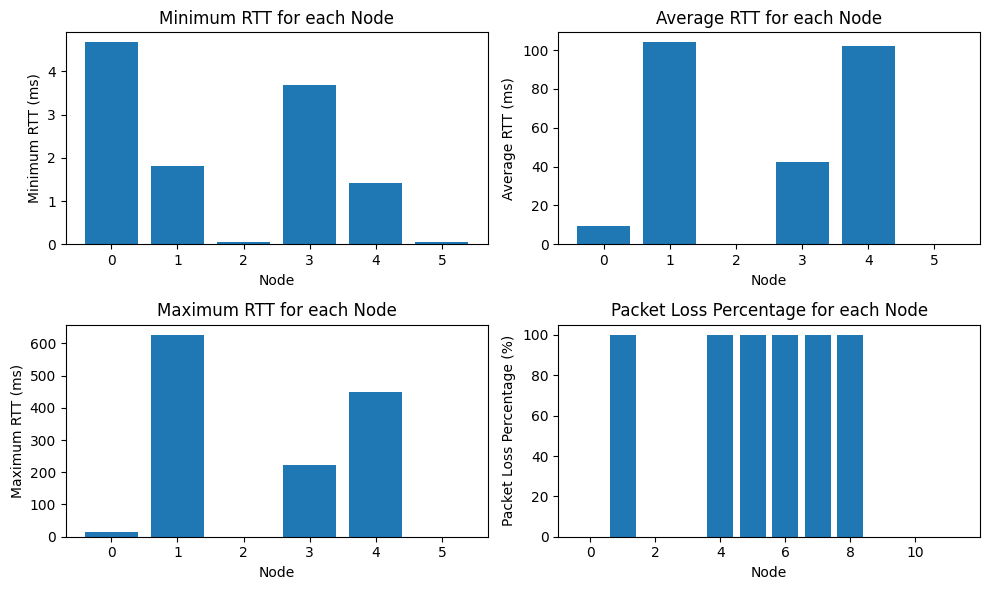

In [ ]:
# compare the performance of BATMAN and OLSR by plotting the results of the iperf and ping tests for each routing protocol
# have them on a bar chart with the different metrics on the y axis and the routing protocols on the x axis
# have a separate chart for each metric

def visualize_data(folder_paths, preexisting_chart=False):
    # if preexisting_chart:
        # fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    # else:
        # plt.figure(figsize=(10, 6))
    # Initialize lists to store data from both folders
    all_min_rtts = []
    all_avg_rtts = []
    all_max_rtts = []
    all_packet_loss_percentages = []

    # Iterate through each folder path
    for folder_path in folder_paths:
        # Load data from the folder
        iperf_data, ping_data = load_data(folder_path)

        # Plot ping metrics for each node
        ips = ping_data['ips']
        data = ping_data['data']

        # Extracting data
        min_rtts = []
        avg_rtts = []
        max_rtts = []
        packet_loss_percentages = []

        for ip in ips:
            ip_data = data[ip]
            packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

            if min_rtt != -1:
                min_rtts.append(float(min_rtt))
            if avg_rtt != -1:
                avg_rtts.append(float(avg_rtt))
            if max_rtt != -1:
                max_rtts.append(float(max_rtt))
            packet_loss_percentages.append(float(packet_loss))

        # Append data to the lists
        all_min_rtts.append(min_rtts)
        all_avg_rtts.append(avg_rtts)
        all_max_rtts.append(max_rtts)
        all_packet_loss_percentages.append(packet_loss_percentages)

    # Combine data from both folders
    combined_min_rtts = np.concatenate(all_min_rtts)
    combined_avg_rtts = np.concatenate(all_avg_rtts)
    combined_max_rtts = np.concatenate(all_max_rtts)
    combined_packet_loss_percentages = np.concatenate(all_packet_loss_percentages)

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.bar(range(len(combined_min_rtts)), combined_min_rtts)
    plt.xlabel('Node')
    plt.ylabel('Minimum RTT (ms)')
    plt.title('Minimum RTT for each Node')

    plt.subplot(2, 2, 2)
    plt.bar(range(len(combined_avg_rtts)), combined_avg_rtts)
    plt.xlabel('Node')
    plt.ylabel('Average RTT (ms)')
    plt.title('Average RTT for each Node')

    plt.subplot(2, 2, 3)
    plt.bar(range(len(combined_max_rtts)), combined_max_rtts)

    plt.xlabel('Node')
    plt.ylabel('Maximum RTT (ms)')
    plt.title('Maximum RTT for each Node')

    plt.subplot(2, 2, 4)
    plt.bar(range(len(combined_packet_loss_percentages)), combined_packet_loss_percentages)
    plt.xlabel('Node')
    plt.ylabel('Packet Loss Percentage (%)')
    plt.title('Packet Loss Percentage for each Node')

    plt.tight_layout()
    plt.show()

# Modify main function to pass both folder paths
def main(root_folder):
    folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi2'),
        os.path.join(root_folder, 'OLSR', 'MESH', '3', 'pi2')
    ]
    visualize_data(folder_paths)
    # visualize_data(folder_paths)
    
# Define the root folder
root_folder = './finalized_data/'

# Call the main function
main(root_folder)

# Further Ping Analysis

In [314]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# # def load_data(folder_path):
# #     # Implement loading data from folder_path
# #     pass

# def visualize_data(folder_paths, preexisting_chart=False):
#     colors = ['blue', 'green']  # Colors for different routing protocols

#     # Initialize lists to store data from both folders
#     all_min_rtts = []
#     all_avg_rtts = []
#     all_max_rtts = []
#     all_packet_loss_percentages = []

#     # Iterate through each folder path and assign color
#     for i, folder_path in enumerate(folder_paths):
#         # Load data from the folder
#         iperf_data, ping_data = load_data(folder_path)

#         # Plot ping metrics for each node
#         ips = ping_data['ips']
#         data = ping_data['data']

#         # Extracting data
#         min_rtts = []
#         avg_rtts = []
#         max_rtts = []
#         packet_loss_percentages = []

#         for ip in ips:
#             ip_data = data[ip]
#             packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

#             if min_rtt != -1:
#                 min_rtts.append(float(min_rtt))
#             if avg_rtt != -1:
#                 avg_rtts.append(float(avg_rtt))
#             if max_rtt != -1:
#                 max_rtts.append(float(max_rtt))
#             packet_loss_percentages.append(float(packet_loss))

#         # Append data to the lists
#         all_min_rtts.append(min_rtts)
#         all_avg_rtts.append(avg_rtts)
#         all_max_rtts.append(max_rtts)
#         all_packet_loss_percentages.append(packet_loss_percentages)

#         # make figure title the current folder path
#         # Plotting with color differentiation
#         plt.figure(figsize=(10, 6))
#         plt.suptitle(folder_path)  # Set the title to the folder path
#         # make x axis only increment by 1
#         plt.xticks(range(len(min_rtts)), range(1, len(min_rtts) + 1))
#         plt.subplot(2, 2, 1)
#         plt.bar(range(len(min_rtts)), min_rtts, color=colors[i])
#         plt.xlabel('Node')
#         plt.ylabel('Minimum RTT (ms)')
#         plt.title('Minimum RTT for each Node')

#         plt.subplot(2, 2, 2)
#         plt.bar(range(len(avg_rtts)), avg_rtts, color=colors[i])
#         plt.xlabel('Node')
#         plt.ylabel('Average RTT (ms)')
#         plt.title('Average RTT for each Node')

#         plt.subplot(2, 2, 3)
#         plt.bar(range(len(max_rtts)), max_rtts, color=colors[i])
        
#         plt.xlabel('Node')
#         plt.ylabel('Maximum RTT (ms)')
#         plt.title('Maximum RTT for each Node')

#         plt.subplot(2, 2, 4)
#         plt.bar(range(len(packet_loss_percentages)), packet_loss_percentages, color=colors[i])
#         plt.xlabel('Node')
#         plt.ylabel('Packet Loss Percentage (%)')
#         plt.title('Packet Loss Percentage for each Node')

#         plt.tight_layout()
#         plt.show()

# # Modify main function to pass both folder paths
# def main(root_folder):
#     folder_paths = [
#         os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi2'),
#         os.path.join(root_folder, 'OLSR', 'MESH', '3', 'pi2')
#     ]
#     visualize_data(folder_paths)
    
# # Define the root folder
# root_folder = './finalized_data/'

# # Call the main function
# main(root_folder)


In [313]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# # def load_data(folder_path):
# #     # Implement loading data from folder_path
# #     pass
# metrics = ['min_rtt', 'avg_rtt', 'max_rtt', 'packet_loss']
# def visualize_data(folder_paths):
#     # Initialize lists to store data from both folders
#     all_min_rtts = []
#     all_avg_rtts = []
#     all_max_rtts = []
#     all_packet_loss_percentages = []
#     colors = ['blue', 'green']  # Colors for different routing protocols
#     print("folder paths", folder_paths)
#     # Iterate through each folder path and assign color
#     for i, folder_path in enumerate(folder_paths):
#         # Load data from the folder
#         print("FP", folder_path)
#         iperf_data, ping_data = load_data(folder_path)
#         print(folder_path)
#         print("ping daata", ping_data)

#         # Plot ping metrics for each node
#         ips = ping_data['ips']
#         data = ping_data['data']

#         # Extracting data
#         min_rtts = []
#         avg_rtts = []
#         max_rtts = []
#         packet_loss_percentages = []

#         for ip in ips:
#             ip_data = data[ip]
#             packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

#             if min_rtt != -1:
#                 min_rtts.append(float(min_rtt))
#             if avg_rtt != -1:
#                 avg_rtts.append(float(avg_rtt))
#             if max_rtt != -1:
#                 max_rtts.append(float(max_rtt))
#             packet_loss_percentages.append(float(packet_loss))

#         # Append data to the lists
#         all_min_rtts.append(min_rtts)
#         all_avg_rtts.append(avg_rtts)
#         all_max_rtts.append(max_rtts)
#         all_packet_loss_percentages.append(packet_loss_percentages)

#     # Plotting
#     num_metrics = 2  # Number of metrics
#     num_protocols = len(folder_paths)  # Number of routing protocols
#     width = 0.35  # Width of each bar

#     fig, axs = plt.subplots(num_metrics, 1, figsize=(5, 5))

#     for metric_idx in range(num_metrics):
#         metric_data = [data[metric_idx] for data in [all_min_rtts, all_avg_rtts, all_max_rtts, all_packet_loss_percentages]]
#         # metric_data = metric_data[:3]
#         print(metric_data)

#         x = np.arange(len(metric_data[0]))  # the label locations

#         for protocol_idx in range(num_protocols):
#             axs[metric_idx].bar(x + width * protocol_idx, metric_data[protocol_idx], width, label=folder_paths[protocol_idx], color=colors[protocol_idx])

#         # Add labels and title
#         axs[metric_idx].set_ylabel('RTT (ms)' if metric_idx < 3 else 'Packet Loss (%)')
#         axs[metric_idx].set_title('Metric {}'.format(metrics[metric_idx]))
#         axs[metric_idx].set_xticks(x + width * num_protocols / 2)
#         axs[metric_idx].set_xticklabels([str(i) for i in range(len(metric_data[0]))])
#         axs[metric_idx].legend()

#     plt.tight_layout()
#     plt.show()

# # Modify main function to pass both folder paths
# def main(root_folder):
#     folder_paths = [
#         os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2'),
#         os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2')
#     ]
#     print("folder paths", folder_paths)
#     visualize_data(folder_paths)
    
# # Define the root folder
# root_folder = './finalized_data/'

# # Call the main function
# main(root_folder)


# iperf3 Analysis #1

# iperf3 Analysis #2

# iperf3 Analysis #3

In [306]:
# import json
# import pandas as pd
# import matplotlib.pyplot as plt

# folder_paths = [
#         os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi3', 'iperf0.json'),
#         os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi3', 'iperf0.json')
#     ]
# # Load JSON data from both files
# with open(folder_paths[0], 'r') as f1:
#     data1 = json.load(f1)

# with open(folder_paths[1], 'r') as f2:
#     data2 = json.load(f2)

# # Extract relevant data
# bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
# bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]

# # reverse_bits_per_second_data1 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data1['intervals']]
# # reverse_bits_per_second_data2 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data2['intervals']]

# olsr_rtt = [interval['streams'][0]['rtt'] for interval in data2['intervals']]
# olsr_rtt_var = [interval['streams'][0]['rttvar'] for interval in data2['intervals']]
# batman_rtt = [interval['streams'][0]['rtt'] for interval in data1['intervals']]
# batman_rtt_var = [interval['streams'][0]['rttvar'] for interval in data1['intervals']]

# # Plotting
# fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# # main title for the entire plot
# fig.suptitle('Comparison of BATMAN and OLSR. Protocol 1 is BATMAN and Protocol 2 is OLSR')
# # Plot RTT Comparison
# axs[0, 0].plot(range(len(olsr_rtt)), olsr_rtt, label='OLSR RTT')
# axs[0, 0].plot(range(len(olsr_rtt_var)), olsr_rtt_var, label='OLSR RTT Variance')
# axs[0, 0].plot(range(len(batman_rtt)), batman_rtt, label='BATMAN RTT')
# axs[0, 0].plot(range(len(batman_rtt_var)), batman_rtt_var, label='BATMAN RTT Variance')
# axs[0, 0].set_xlabel('Interval')
# axs[0, 0].set_ylabel('RTT')
# axs[0, 0].set_title('RTT Comparison')
# axs[0, 0].legend()
# axs[0, 0].grid(True)

# # Plot Average RTT Comparison
# axs[0, 1].bar(['BATMAN', 'OLSR'], [sum(batman_rtt) / len(batman_rtt), sum(olsr_rtt) / len(olsr_rtt)], label='RTT',color=['blue', 'green'])
# axs[0, 1].bar(['BATMAN Variance', 'OLSR Variance'], [sum(batman_rtt_var) / len(batman_rtt_var), sum(olsr_rtt_var) / len(olsr_rtt_var)], label='RTT Variance',color=['blue', 'green'])
# axs[0, 1].set_xlabel('Protocol')
# axs[0, 1].set_ylabel('Average RTT')
# axs[0, 1].set_title('Average RTT Comparison')
# axs[0, 1].legend()
# axs[0, 1].grid(True)

# # Plot Comparison of Protocols
# df = pd.DataFrame({
#     'Protocol1': bits_per_second_data1,
#     'Protocol2': bits_per_second_data2,
#     # 'Reverse1': reverse_bits_per_second_data1,
#     # 'Reverse2': reverse_bits_per_second_data2
# })

# axs[1, 0].plot(df.index, df['Protocol1'], label='BATMAN', color='b', marker='s')
# axs[1, 0].plot(df.index, df['Protocol2'], label='OLSR', color='r', marker='s')
# # axs[1, 0].plot(df.index, df['Reverse1'], label='BATMAN Reverse', color='g', marker='s')
# # axs[1, 0].plot(df.index, df['Reverse2'], label='OLSR Reverse', color='y', marker='s')
# axs[1, 0].set_xlabel('Interval')
# axs[1, 0].set_ylabel('Bits per Second')
# axs[1, 0].set_title('Comparison of Protocols')
# axs[1, 0].legend()
# axs[1, 0].grid(True)

# # Plot Average Bits per Second per Protocol
# axs[1, 1].bar(['BATMAN', 'OLSR'], [df['Protocol1'].mean(), df['Protocol2'].mean()], label='Protocol', color=['blue', 'green'])
# # axs[1, 1].bar(['BATMAN Reverse', 'OLSR Reverse'], [df['Reverse1'].mean(), df['Reverse2'].mean()], label='Reverse', color=['blue', 'green'])
# axs[1, 1].set_xlabel('Protocol')
# axs[1, 1].set_ylabel('Average Bits per Second (Mbps)')
# axs[1, 1].set_title('Average Bits per Second Comparison')
# axs[1, 1].legend()
# axs[1, 1].grid(True)


# plt.tight_layout()
# plt.show()




In [305]:
# import json
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# def plot_cdf_comparison(root_folder, pi_folders, topologies, protocols=('BATMAN', 'OLSR')):
#     """
#     Plots the CDF comparison of specified protocols.

#     Parameters:
#     root_folder (str): The root folder containing the data files.
#     pi_folders (list): A list of Pi folder names to include in the analysis (e.g., ['pi2', 'pi3']).
#     topologies (list): A list of topology names to include in the analysis (e.g., ['MESH', 'PAIR']).
#     protocols (tuple): A tuple containing protocol names to compare (default=('BATMAN', 'OLSR')).
#     """
#     folder_paths = []
#     for topology in topologies:
#         for pi_folder in pi_folders:
#             folder_paths.extend([
#                 (os.path.join(root_folder, protocol, topology, '3', pi_folder, 'iperf1.json'),
#                  os.path.join(root_folder, protocol, topology, '3', pi_folder, 'iperf0.json'))
#                 for protocol in protocols
#             ])

#     fig, axs = plt.subplots(len(pi_folders) * len(topologies), 2, figsize=(8, 4 * len(pi_folders) * len(topologies)))

#     x_min, x_max = float('inf'), float('-inf')
#     y_min, y_max = 0, 1.05  

#     for i, (path1, path2) in enumerate(folder_paths):
#         with open(path1, 'r') as f1:
#             data1 = json.load(f1)
#         with open(path2, 'r') as f2:
#             data2 = json.load(f2)

#         bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
#         bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]
        
#         bits_per_second_data1 = [bps / 1e6 for bps in bits_per_second_data1]
#         bits_per_second_data2 = [bps / 1e6 for bps in bits_per_second_data2]

#         cdf_data1 = np.sort(bits_per_second_data1)
#         cdf_data2 = np.sort(bits_per_second_data2)
#         # add cdf 2 to cdf 1
#         # cdf_data1 = np.concatenate((cdf_data1, cdf_data2))

#         cdf1 = np.arange(1, len(cdf_data1) + 1) / len(cdf_data1)
#         cdf2 = np.arange(1, len(cdf_data2) + 1) / len(cdf_data2)
#         # cdf_data1 = np.sort(cdf_data1)
#         cdf2 = np.arange(1, len(cdf_data2) + 1) / len(cdf_data2)
#         # cdf = axis is np.linspace(0,1, len(sorted_data))
#         row = i // 2
#         col = i % 2
#         # make the plot smooth
#         #
#         axs[row, col].plot(cdf_data1, cdf1, label=protocols[0], color='b')
#         axs[row, col].plot(cdf_data2, cdf2, label=protocols[1], color='r')
#         axs[row, col].set_xlabel('Mbps')
#         axs[row, col].set_ylabel('CDF')
#         axs[row, col].set_title(f"CDF Bps {topologies[i // (2 * len(pi_folders))]} 3 {pi_folders[i // (2 * len(topologies))]}")
#         axs[row, col].legend()
#         axs[row, col].grid(True)

#         x_min = min(x_min, min(cdf_data1), min(cdf_data2))
#         x_max = max(x_max, max(cdf_data1), max(cdf_data2))

#     for row in range(len(pi_folders) * len(topologies)):
#         for col in range(2):
#             axs[row, col].set_xlim(x_min, x_max)
#             axs[row, col].set_ylim(y_min, y_max)

#     plt.tight_layout()
#     plt.show()

# root_folder = './finalized_data/'
# pi_folders = ['pi2', 'pi3']
# topologies = ['LINE','MESH', 'PAIR']
# # topologies = ['LINE']
# # protocols
# plot_cdf_comparison(root_folder, pi_folders, topologies)


file path 1 ./finalized_data/BATMAN/MESH/6/pi2/iperf1.json
file path 1 ./finalized_data/OLSR/MESH/6/pi2/iperf1.json
file path 1 ./finalized_data/BATMAN/MESH/6/pi3/iperf1.json
file path 1 ./finalized_data/OLSR/MESH/6/pi3/iperf1.json
file path 1 ./finalized_data/BATMAN/MESH/6/pi4/iperf1.json
file path 1 ./finalized_data/OLSR/MESH/6/pi4/iperf1.json
file path 1 ./finalized_data/BATMAN/MESH/6/pi5/iperf1.json
file path 1 ./finalized_data/OLSR/MESH/6/pi5/iperf1.json

Topology: MESH

Protocol: BATMAN
Number of data points: 399
Mean: 11.80 Mbps
Standard Deviation: 5.82 Mbps
-----

Protocol: OLSR
Number of data points: 400
Mean: 20.87 Mbps
Standard Deviation: 8.33 Mbps
-----


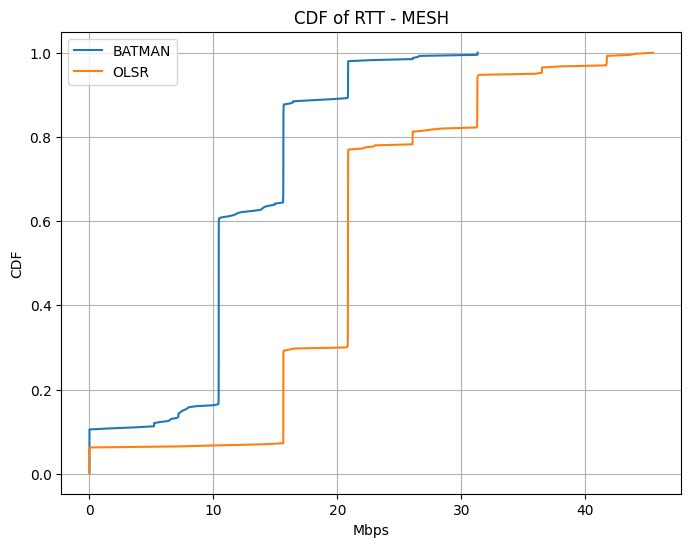

In [88]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_cdf_comparison(root_folder, pi_folders, topologies, protocols=('BATMAN', 'OLSR'), aggregate=False):
    """
    Plots the CDF comparison of specified protocols.

    Parameters:
    root_folder (str): The root folder containing the data files.
    pi_folders (list): A list of Pi folder names to include in the analysis (e.g., ['pi2', 'pi3']).
    topologies (list): A list of topology names to include in the analysis (e.g., ['MESH', 'PAIR']).
    protocols (tuple): A tuple containing protocol names to compare (default=('BATMAN', 'OLSR')).
    aggregate (bool): If True, concatenate data from all topologies. If False, aggregate data separately for each topology. Default is False.
    """
    if aggregate:
        # Aggregate data from all topologies together
        aggregated_data = {protocol: [] for protocol in protocols}
    else:
        # Initialize lists to hold aggregated data for each protocol within each topology
        aggregated_data = {topology: {protocol: [] for protocol in protocols} for topology in topologies}
        
    # Iterate over each topology
    for topology in topologies:
        # Iterate over each Pi folder
        for pi_folder in pi_folders:
            # Iterate over each protocol
            for protocol in protocols:
                # Get the file paths for iperf JSON files
                file_path1 = os.path.join(root_folder, protocol, topology, '6', pi_folder, 'iperf1.json')
                file_path2 = os.path.join(root_folder, protocol, topology, '6', pi_folder, 'iperf0.json')
                print("file path 1", file_path1)
                file_paths = [file_path1, file_path2]
                # for file_path in file_paths:
                #     # if os.path.exists(file_path1) and os.path.exists(file_path2):
                #         # Read the JSON files and extract bits_per_second data
                #         with open(file_path, 'r') as f:
                #             data = json.load(f)
                #             bits_per_second_data = [interval['sum']['bits_per_second'] / 1e6 for interval in data['intervals']]
                #             if aggregate:
                #                 aggregated_data[protocol].extend(bits_per_second_data)
                #             else:
                #                 aggregated_data[topology][protocol].extend(bits_per_second_data)
                                        
                # Check if JSON files exist
                # if os.path.exists(file_path1) and os.path.exists(file_path2):
                    # Read the JSON files and extract bits_per_second data
                with open(file_path1, 'r') as f:
                        data1 = json.load(f)
                        bits_per_second_data1 = [interval['sum']['bits_per_second'] / 1e6 for interval in data1['intervals']]
                        # bits_per_second_data1 = [interval['streams'][0]['rtt'] for interval in data1['intervals']]

                        if aggregate:
                            aggregated_data[protocol].extend(bits_per_second_data1)
                        else:
                            aggregated_data[topology][protocol].extend(bits_per_second_data1)

                with open(file_path2, 'r') as f:
                        data2 = json.load(f)
                        bits_per_second_data2 = [interval['sum']['bits_per_second'] / 1e6 for interval in data2['intervals']]
                        # bits_per_second_data2 = [interval['streams'][0]['rtt']  for interval in data2['intervals']]

                        if aggregate:
                            aggregated_data[protocol].extend(bits_per_second_data2)
                        else:
                            aggregated_data[topology][protocol].extend(bits_per_second_data2)

    # Print statistics if not aggregating
    if not aggregate:
        for topology in topologies:
            print(f"\nTopology: {topology}")
            for protocol in protocols:
                data = aggregated_data[topology][protocol]
                mean = np.mean(data)
                std_dev = np.std(data)
                data_len = len(data)
                print(f"\nProtocol: {protocol}")
                print(f"Number of data points: {data_len}")
                print(f"Mean: {mean:.2f} Mbps")
                print(f"Standard Deviation: {std_dev:.2f} Mbps")
                print("-----")
    
    # Plot CDF for each topology and protocol
    if aggregate:
        fig, ax = plt.subplots(figsize=(8, 6))
        for protocol in protocols:
            # Compute CDF for the combined data
            sorted_data = np.sort(aggregated_data[protocol])
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            # Plot CDF
            ax.plot(sorted_data, cdf, label=protocol)
        ax.set_xlabel('Mbps')
        ax.set_ylabel('CDF')
        ax.set_title("CDF of Bits Per Second - Aggregate")
        print("total data points:", len(sorted_data))
        for protocol in protocols:
            data = aggregated_data[protocol]
            mean = np.mean(data)
            std_dev = np.std(data)
            data_len = len(data)
            print(f"\nProtocol: {protocol}")
            print(f"Number of data points: {data_len}")
            print(f"Mean: {mean:.2f} Mbps")
            print(f"Standard Deviation: {std_dev:.2f} Mbps")
            print("-----")
        ax.legend()
        ax.grid(True)
        plt.show()
    else:
        for topology in topologies:
            fig, ax = plt.subplots(figsize=(8, 6))
            for protocol in protocols:
                # Compute CDF for the combined data
                sorted_data = np.sort(aggregated_data[topology][protocol])
                cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
                # Plot CDF
                ax.plot(sorted_data, cdf, label=protocol)
            ax.set_xlabel('Mbps')
            ax.set_ylabel('CDF')
            ax.set_title(f"CDF of RTT - {topology}")
            ax.legend()
            ax.grid(True)
            plt.show()

root_folder = './finalized_data/'
pi_folders = ['pi2', 'pi3', 'pi4', 'pi5']
topologies = ['MESH']
plot_cdf_comparison(root_folder, pi_folders, topologies, aggregate=False)


Examining Bandwidth in PAIR
Protocol: BATMAN
Number of data points: 200
Mean: 9.13 
Standard Deviation: 6.88 
-----
Examining Bandwidth in PAIR
Protocol: OLSR
Number of data points: 200
Mean: 23.06 
Standard Deviation: 9.60 
-----
Examining Bandwidth in MESH
Protocol: BATMAN
Number of data points: 200
Mean: 8.08 
Standard Deviation: 5.83 
-----
Examining Bandwidth in MESH
Protocol: OLSR
Number of data points: 200
Mean: 24.98 
Standard Deviation: 8.81 
-----
Examining Bandwidth in LINE
Protocol: BATMAN
Number of data points: 200
Mean: 8.34 
Standard Deviation: 8.27 
-----
Examining Bandwidth in LINE
Protocol: OLSR
Number of data points: 200
Mean: 12.30 
Standard Deviation: 9.28 
-----


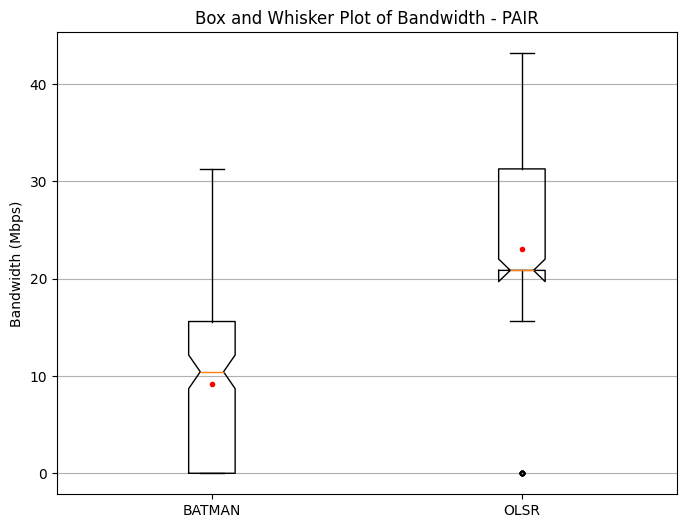

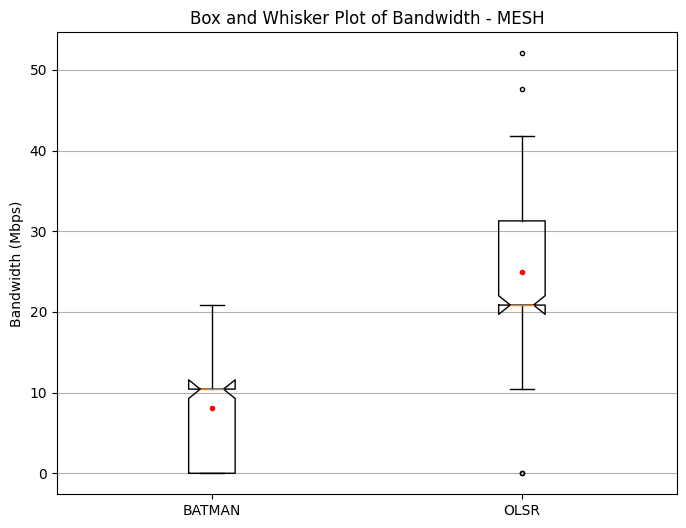

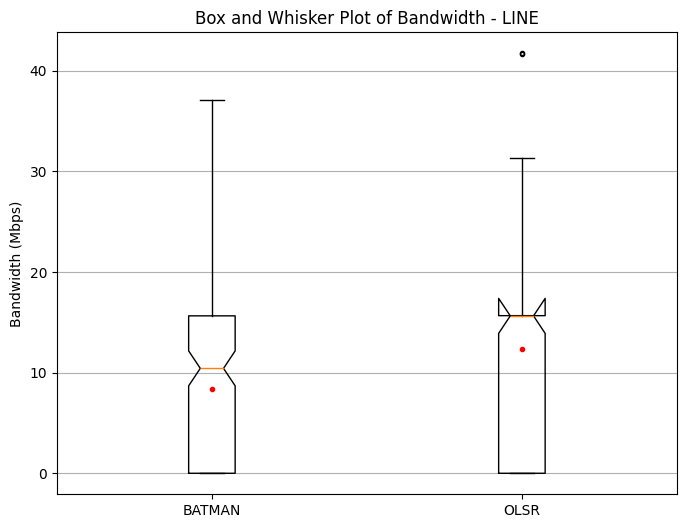

In [40]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_cdf_comparison(root_folder, pi_folders, topologies, protocols=('BATMAN', 'OLSR'), aggregate=False, box_plot=False, pi_count='3', rtt=True):
    """
    Plots the CDF comparison or box and whisker plot of specified protocols.

    Parameters:
    root_folder (str): The root folder containing the data files.
    pi_folders (list): A list of Pi folder names to include in the analysis (e.g., ['pi2', 'pi3']).
    topologies (list): A list of topology names to include in the analysis (e.g., ['MESH', 'PAIR']).
    protocols (tuple): A tuple containing protocol names to compare (default=('BATMAN', 'OLSR')).
    aggregate (bool): If True, concatenate data from all topologies. If False, aggregate data separately for each topology. Default is False.
    box_plot (bool): If True, generate a box and whisker plot. If False, generate a cumulative distribution function (CDF) plot. Default is False.
    """
    if aggregate:
        # Aggregate data from all topologies together
        aggregated_data = {protocol: [] for protocol in protocols}
    else:
        # Initialize lists to hold aggregated data for each protocol within each topology
        aggregated_data = {topology: {protocol: [] for protocol in protocols} for topology in topologies}
        
    # Iterate over each topology
    for topology in topologies:
        # Iterate over each Pi folder
        for pi_folder in pi_folders:
            # Iterate over each protocol
            for protocol in protocols:
                # Get the file paths for iperf JSON files
                file_path1 = os.path.join(root_folder, protocol, topology, pi_count, pi_folder, 'iperf1.json')
                file_path2 = os.path.join(root_folder, protocol, topology, pi_count, pi_folder, 'iperf0.json')

                # Check if JSON files exist
                # if os.path.exists(file_path1) and os.path.exists(file_path2):
                    # Read the JSON files and extract bits_per_second data
                with open(file_path1, 'r') as f:
                        data1 = json.load(f)
                        # bits_per_second_data1 = [interval['sum']['bits_per_second'] / 1e6 for interval in data1['intervals']]
                        if rtt:
                            bits_per_second_data1 = [interval['streams'][0]['rtt']/1000 for interval in data1['intervals']]
                        else:
                            bits_per_second_data1 = [interval['sum']['bits_per_second'] / 1e6 for interval in data1['intervals']]

                        if aggregate:
                            aggregated_data[protocol].extend(bits_per_second_data1)
                        else:
                            aggregated_data[topology][protocol].extend(bits_per_second_data1)

                with open(file_path2, 'r') as f:
                        data2 = json.load(f)
                        if rtt:
                            # turn rtt into ms 
                            bits_per_second_data2 = [interval['streams'][0]['rtt']/1000 for interval in data2['intervals']]
                        else :
                            bits_per_second_data2 = [interval['sum']['bits_per_second'] / 1e6 for interval in data2['intervals']]
                        if aggregate:
                            aggregated_data[protocol].extend(bits_per_second_data2)
                        else:
                            aggregated_data[topology][protocol].extend(bits_per_second_data2)

    # Print statistics if not aggregating
    if not aggregate:
        for topology in topologies:
            # print(f"\nTopology: {topology}")
            for protocol in protocols:
                data = aggregated_data[topology][protocol]
                mean = np.mean(data)
                std_dev = np.std(data)
                data_len = len(data)
                if rtt:
                    print(f"Examining RTT in {topology}")
                else: 
                    print(f"Examining Bandwidth in {topology}")
                print(f"Protocol: {protocol}")
                print(f"Number of data points: {data_len}")
                print(f"Mean: {mean:.2f} ")
                print(f"Standard Deviation: {std_dev:.2f} ")
                print("-----")
    
    # Plot CDF or box and whisker plot for each topology and protocol
    if aggregate:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.grid(True)
        if box_plot:
            # Generate box and whisker plot for the combined data
            # sort the data
            print("in here")
            # aggregated_data = {protocol: np.sort(aggregated_data[protocol]) for protocol in protocols}
            ax.boxplot([aggregated_data[protocol] for protocol in protocols],
                        labels=protocols,
                        showfliers=True,
                        flierprops=dict(marker='.', color='black'),
                        patch_artist=True, showmeans=True,
                        meanprops=dict(marker='.', markerfacecolor='red', markeredgecolor='red')) # show mean
            # ax.violinplot([aggregated_data[protocol] for protocol in protocols], 
            #   showmeans=True, )
            # print("protcol:", protocols)
            # [print(aggregated_data[protocol]) for protocol in protocols]

            for protocol in protocols: 
                if rtt:
                    print(f"\nExamining RTT in Protocol: {protocol}")
                else : 
                    print(f"\nExamining Bandwidth in Protocol: {protocol}")

                print ("total data points:", len(aggregated_data[protocol]))
                print("mean:", np.mean(aggregated_data[protocol]))
                print("std dev:", np.std(aggregated_data[protocol]))
                print ("max:", np.max(aggregated_data[protocol]))
                print ("min:", np.min(aggregated_data[protocol]))
            if rtt:
                ax.set_ylabel('RTT (ms)')
                ax.set_title("Box and Whisker Plot of RTT - Aggregate")
            else:
                ax.set_ylabel('Bandwidth (Mbps)')
                ax.set_title("Box and Whisker Plot of Bandwidth - Aggregate")

        else:
            for protocol in protocols:
               
                # Compute CDF for the combined data
                sorted_data = np.sort(aggregated_data[protocol])
                cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
                # Plot CDF
                # ax.plot(sorted_data, cdf, label=protocol)
                ax.plot(sorted_data, cdf, label=protocol)
                # enable horizontal lines across the grid
                # mark the mean
                if protocol == 'OLSR':
                    ax.axvline(np.mean(aggregated_data[protocol]), color='grey', linestyle='--', label='Mean of ' + protocol)
                else:
                    ax.axvline(np.mean(aggregated_data[protocol]), color='#444444', linestyle='--', label='Mean of ' + protocol)
                if rtt:
                    print(f"\nExamining RTT in Protocol: {protocol}")
                else : 
                    print(f"\nExamining Bandwidth in Protocol: {protocol}")

                print ("total data points:", len(aggregated_data[protocol]))
                print("mean:", np.mean(aggregated_data[protocol]))
                print("std dev:", np.std(aggregated_data[protocol]))
                print ("max:", np.max(aggregated_data[protocol]))
                print ("min:", np.min(aggregated_data[protocol]))

            if rtt:
                ax.set_xlabel('RTT (ms)')
                ax.set_ylabel('CDF')
                ax.set_title("CDF of RTT - Aggregate")

            else:
                ax.set_xlabel('Bandwidth (Mbps)')
                ax.set_ylabel('CDF')
                ax.set_title("CDF of Bandwidth - Aggregate")
            ax.legend()
        plt.show()
    else:
        for topology in topologies:
            fig, ax = plt.subplots(figsize=(8, 6))
            # ax.grid(True, which='x')
            # only enable grid for x axis
            ax.grid(True, which='major', axis='y')
            
            if box_plot:
                # Generate box and whisker plot for each protocol within the topology
                data = [aggregated_data[topology][protocol] for protocol in protocols]
                # ax.boxplot(data, labels=protocols)
                ax.boxplot(data,
                            labels=protocols, showfliers=True,
                            flierprops=dict(marker='.', color='black'),
                            notch=False, showmeans=True,
                            meanprops=dict(marker='.', markerfacecolor='red', markeredgecolor='red'))
                if rtt:
                    ax.set_ylabel('RTT (ms)')
                    ax.set_title(f"Box and Whisker Plot of RTT - {topology}")
                else:
                    ax.set_ylabel('Bandwidth (Mbps)')
                    ax.set_title(f"Box and Whisker Plot of Bandwidth - {topology}")
            else:
                for protocol in protocols:
                    # Compute CDF for the combined data
                    sorted_data = np.sort(aggregated_data[topology][protocol])
                    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
                    if protocol == 'OLSR':
                        ax.axvline(np.mean(aggregated_data[topology][protocol]), color='grey', linestyle='--', label='Mean of ' + protocol)
                    else:
                        ax.axvline(np.mean(aggregated_data[topology][protocol]), color='#444444', linestyle='--', label='Mean of ' + protocol)
                    ax.plot(sorted_data, cdf, label=protocol)
                
                if rtt:
                    ax.set_xlabel('RTT (ms)')
                    ax.set_ylabel('CDF')
                    ax.set_title(f"CDF of RTT - {topology}")
                    ax.legend()
                else:
                    ax.set_xlabel('Bandwidth (Mbps)')
                    ax.set_ylabel('CDF')
                    ax.set_title(f"CDF of Bandwidth - {topology}")
                    ax.legend()
            plt.show()

# root_folder = './finalized_data_mobile/'
root_folder = './finalized_data/'

pi_folders = ['pi2', 'pi3']
topologies = [ 'PAIR', 'MESH', 'LINE']
plot_cdf_comparison(root_folder, pi_folders, topologies, aggregate=False, box_plot=True, pi_count='3', rtt=False)


Opening file ./finalized_data/BATMAN/LINE/6/pi2/iperf0.json placing it in BATMAN LINE pi2
Opening file ./finalized_data/BATMAN/LINE/6/pi2/iperf1.json placing it in BATMAN LINE pi2
Opening file ./finalized_data/OLSR/LINE/6/pi2/iperf0.json placing it in OLSR LINE pi2
Opening file ./finalized_data/OLSR/LINE/6/pi2/iperf1.json placing it in OLSR LINE pi2
Opening file ./finalized_data/BATMAN/LINE/6/pi3/iperf0.json placing it in BATMAN LINE pi3
Opening file ./finalized_data/BATMAN/LINE/6/pi3/iperf1.json placing it in BATMAN LINE pi3
Opening file ./finalized_data/OLSR/LINE/6/pi3/iperf0.json placing it in OLSR LINE pi3
Opening file ./finalized_data/OLSR/LINE/6/pi3/iperf1.json placing it in OLSR LINE pi3
Opening file ./finalized_data/BATMAN/LINE/6/pi4/iperf0.json placing it in BATMAN LINE pi4
Opening file ./finalized_data/BATMAN/LINE/6/pi4/iperf1.json placing it in BATMAN LINE pi4
Opening file ./finalized_data/OLSR/LINE/6/pi4/iperf0.json placing it in OLSR LINE pi4
Opening file ./finalized_data/

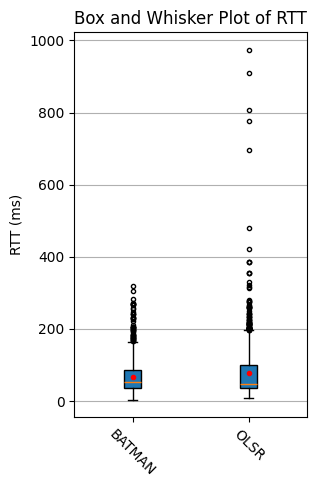

In [59]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_cdf_comparison(root_folder, pi_folders, topologies, protocols=('BATMAN', 'OLSR'), aggregate=False, box_plot=False, pi_count='3', rtt=True):
    if aggregate:
        aggregated_data = {protocol: [] for protocol in protocols}
    else:
        aggregated_data = {pi: {topology: {protocol: [] for protocol in protocols} for topology in topologies} for pi in pi_folders}
        
    for topology in topologies:
        for pi_folder in pi_folders:
            for protocol in protocols:
                file_paths = [os.path.join(root_folder, protocol, topology, pi_count, pi_folder, f'iperf{i}.json') for i in range(2)]
                for file_path in file_paths:
                    with open(file_path, 'r') as f:
                        print("Opening file", file_path, "placing it in", protocol, topology, pi_folder)
                        json_data = json.load(f)
                        data_key = 'rtt' if rtt else 'bits_per_second'
                        data = [interval['streams'][0][data_key] / (1000 if rtt else 1e6) for interval in json_data['intervals']]
                        if aggregate:
                            aggregated_data[protocol].extend(data)
                        else:
                            aggregated_data[pi_folder][topology][protocol].extend(data)

    if not aggregate:
        for topology in topologies:
            for protocol in protocols:
                for pi_folder in pi_folders:
                    data = aggregated_data[pi_folder][topology][protocol]
                    stats = {
                        'mean': np.mean(data),
                        'std_dev': np.std(data),
                        'data_len': len(data)
                    }
                    print(f"Examining {'RTT' if rtt else 'Bandwidth'} in {topology} {pi_folder}")
                    print(f"Protocol: {protocol}")
                    print(f"Number of data points: {stats['data_len']}")
                    print(f"Mean: {stats['mean']:.2f}")
                    print(f"Standard Deviation: {stats['std_dev']:.2f}")
                    # print(f"retransmits: {data[])}")
                    print("-----")
    
    if aggregate:
        fig, ax = plt.subplots(figsize=(3, 5))
        if box_plot:
            # Calculate positions for each protocol's box plot
            positions = np.arange(1, len(protocols) + 1)
            for i, protocol in enumerate(protocols):
                data = aggregated_data[protocol]
                ax.boxplot(data, positions=[positions[i]], labels=[protocol], showfliers=True,
                           flierprops=dict(marker='.', color='black'), patch_artist=True, showmeans=True,
                           meanprops=dict(marker='.', markerfacecolor='red', markeredgecolor='red'))
                ax.grid(True, which='major', axis='y')
                plt.xticks(rotation=-45)

                print(f"\nExamining {'RTT' if rtt else 'Bandwidth'} in Protocol: {protocol}")
                print("Total data points:", len(data))
                print("Mean:", np.mean(data))
                print("Std dev:", np.std(data))
                print("Max:", np.max(data))
                print("Min:", np.min(data))
                print(f"Percentage of time bandwidth is 0: {len([d for d in data if d == 0]) / len(data) * 100:.2f}%" if not rtt else "")
            
            ax.set_ylabel('RTT (ms)' if rtt else 'Bandwidth (Mbps)')
            ax.set_title("Box and Whisker Plot of RTT" if rtt else "Box and Whisker Plot of Bandwidth")
        else:
            for protocol in protocols:
                for pi_folder in pi_folders:
                    sorted_data = np.sort(aggregated_data[pi_folder][protocol])
                    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
                    ax.plot(sorted_data, cdf, label=protocol)
                    ax.axvline(np.mean(aggregated_data[pi_folder][protocol]), color='grey', linestyle='--', label='Mean of ' + protocol)
                        
                    print(f"\nExamining {'RTT' if rtt else 'Bandwidth'} in Protocol: {protocol}")
                    print("Total data points:", len(aggregated_data[pi_folder][protocol]))
                    print("Mean:", np.mean(aggregated_data[pi_folder][protocol]))
                    print("Std dev:", np.std(aggregated_data[pi_folder][protocol]))
                    print("Max:", np.max(aggregated_data[pi_folder][protocol]))
                    print("Min:", np.min(aggregated_data[pi_folder][protocol]))
                    if not rtt:
                      print(f"Percentage of time bandwidth is 0: {len([d for d in aggregated_data[pi_folder][protocol] if d == 0]) / len(aggregated_data[pi_folder][protocol]) * 100:.2f}%")


            ax.set_xlabel('RTT (ms)' if rtt else 'Bandwidth (Mbps)')
            ax.set_ylabel('CDF')
            ax.set_title("CDF of RTT" if rtt else "CDF of Bandwidth")
            ax.legend()
        plt.show()
    else:
        for topology in topologies:
            fig, ax = plt.subplots(figsize=(5, 6))
            if box_plot:
                # Calculate positions for each protocol's box plot
                positions = np.arange(1, len(pi_folders) * len(protocols) + 1)
                for i, pi_folder in enumerate(pi_folders):
                    for j, protocol in enumerate(protocols):
                        data = aggregated_data[pi_folder][topology][protocol]
                        ax.boxplot(data, positions=[positions[i * len(protocols) + j]], labels=[f"{protocol} - {pi_folder}"], showfliers=True,
                                flierprops=dict(marker='.', color='black'), patch_artist=True, showmeans=True,
                                meanprops=dict(marker='.', markerfacecolor='red', markeredgecolor='red'))
                        # put the labels at a 45 degree angle
                        plt.xticks(rotation=-45)

                        ax.grid(True, which='major', axis='y')

                        print(f"\nExamining {'RTT' if rtt else 'Bandwidth'} in Topology: {topology} for Pi: {pi_folder}")
                        print(f"Total data points for {protocol}: {len(data)}")
                        print(f"Mean for {protocol}: {np.mean(data)}")
                        print(f"Std dev for {protocol}: {np.std(data)}")
                        print(f"Max for {protocol}: {np.max(data)}")
                        print(f"Min for {protocol}: {np.min(data)}")
                        # calculate percentage of the time the bandwidth is 0
                        print(f"Percentage of time bandwidth is 0: {len([d for d in data if d == 0]) / len(data) * 100:.2f}%")

                ax.set_ylabel('RTT (ms)' if rtt else 'Bandwidth (Mbps)')
                ax.set_title(f"Box and Whisker Plot of {'RTT' if rtt else 'Bandwidth'} - {topology}")
            else:
                for protocol in protocols:
                    for pi_folder in pi_folders:
                        sorted_data = np.sort(aggregated_data[pi_folder][topology][protocol])
                        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
                        ax.plot(sorted_data, cdf, label=f"{protocol} - {pi_folder}")
                        ax.axvline(np.mean(aggregated_data[pi_folder][topology][protocol]), color='grey', linestyle='--', label=f'Mean of {protocol}')

                        print(f"\nExamining {'RTT' if rtt else 'Bandwidth'} in Topology: {topology} for Pi: {pi_folder} for Protocol: {protocol}")
                        print(f"Total data points for {protocol}: {len(aggregated_data[pi_folder][topology][protocol])}")
                        print(f"Mean for {protocol}: {np.mean(aggregated_data[pi_folder][topology][protocol])}")
                        print(f"Std dev for {protocol}: {np.std(aggregated_data[pi_folder][topology][protocol])}")
                        print(f"Max for {protocol}: {np.max(aggregated_data[pi_folder][topology][protocol])}")
                        print(f"Min for {protocol}: {np.min(aggregated_data[pi_folder][topology][protocol])}")

                ax.set_xlabel('RTT (ms)' if rtt else 'Bandwidth (Mbps)')
                ax.set_ylabel('CDF')
                ax.set_title(f"CDF of {'RTT' if rtt else 'Bandwidth'} - {topology}")
                ax.legend()
            plt.show()

root_folder = './finalized_data/'
pi_folders = ['pi2', 'pi3','pi4', 'pi5']
topologies = ['LINE', 'MESH', 'PAIR']
plot_cdf_comparison(root_folder, pi_folders, topologies, aggregate=True, box_plot=True, pi_count='6', rtt=True)


# iperf3 Analysis #4

In [ ]:
# import json
# import pandas as pd
# import matplotlib.pyplot as plt

# # # Load JSON data from both files
# # with open('data1.json', 'r') as f1:
# #     data1 = json.load(f1)

# # with open('data2.json', 'r') as f2:
# #     data2 = json.load(f2)

# # Extract relevant data
# bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
# bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]

# reverse_bits_per_second_data1 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data1['intervals']]
# reverse_bits_per_second_data2 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data2['intervals']]

# olsr_rtt = [interval['streams'][0]['rtt'] for interval in data2['intervals']]
# olsr_rtt_var = [interval['streams'][0]['rttvar'] for interval in data2['intervals']]
# batman_rtt = [interval['streams'][0]['rtt'] for interval in data1['intervals']]
# batman_rtt_var = [interval['streams'][0]['rttvar'] for interval in data1['intervals']]

# # Plotting
# fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# # main title for the entire plot
# fig.suptitle('Comparison of BATMAN and OLSR. Protocol 1 is BATMAN and Protocol 2 is OLSR')

# # Plot RTT Comparison
# axs[0, 0].plot(range(len(olsr_rtt)), olsr_rtt, label='OLSR RTT', color='blue')
# axs[0, 0].plot(range(len(olsr_rtt_var)), olsr_rtt_var, label='OLSR RTT Variance', color='lightblue')
# axs[0, 0].plot(range(len(batman_rtt)), batman_rtt, label='BATMAN RTT', color='green')
# axs[0, 0].plot(range(len(batman_rtt_var)), batman_rtt_var, label='BATMAN RTT Variance', color='lightgreen')
# axs[0, 0].set_xlabel('Interval')
# axs[0, 0].set_ylabel('RTT')
# axs[0, 0].set_title('RTT Comparison')
# axs[0, 0].legend()
# axs[0, 0].grid(True)

# # Plot Average RTT Comparison
# axs[0, 1].bar(['BATMAN', 'OLSR'], [sum(batman_rtt) / len(batman_rtt), sum(olsr_rtt) / len(olsr_rtt)], label='RTT', color=['green', 'blue'])
# axs[0, 1].bar(['BATMAN Variance', 'OLSR Variance'], [sum(batman_rtt_var) / len(batman_rtt_var), sum(olsr_rtt_var) / len(olsr_rtt_var)], label='RTT Variance', color=['lightgreen', 'lightblue'])
# axs[0, 1].set_xlabel('Protocol')
# axs[0, 1].set_ylabel('Average RTT')
# axs[0, 1].set_title('Average RTT Comparison')
# axs[0, 1].legend()
# axs[0, 1].grid(True)

# # Plot Comparison of Protocols
# df = pd.DataFrame({
#     'Protocol1': bits_per_second_data1,
#     'Protocol2': bits_per_second_data2,
#     'Reverse1': reverse_bits_per_second_data1,
#     'Reverse2': reverse_bits_per_second_data2
# })

# axs[1, 0].plot(df.index, df['Protocol1'], label='BATMAN', color='blue', marker='s')
# axs[1, 0].plot(df.index, df['Protocol2'], label='OLSR', color='green', marker='s')
# axs[1, 0].plot(df.index, df['Reverse1'], label='BATMAN Reverse', color='lightblue', marker='s')
# axs[1, 0].plot(df.index, df['Reverse2'], label='OLSR Reverse', color='lightgreen', marker='s')
# axs[1, 0].set_xlabel('Interval')
# axs[1, 0].set_ylabel('Bits per Second')
# axs[1, 0].set_title('Comparison of Protocols')
# axs[1, 0].legend()
# axs[1, 0].grid(True)

# # Plot Average Bits per Second per Protocol
# axs[1, 1].bar(['BATMAN', 'OLSR'], [df['Protocol1'].mean(), df['Protocol2'].mean()], label='Protocol', color=['blue', 'green'])
# axs[1, 1].bar(['BATMAN Reverse', 'OLSR Reverse'], [df['Reverse1'].mean(), df['Reverse2'].mean()], label='Reverse', color=['lightblue', 'lightgreen'])
# axs[1, 1].set_xlabel('Protocol')
# axs[1, 1].set_ylabel('Average Bits per Second (Mbps)')
# axs[1, 1].set_title('Average Bits per Second Comparison')
# axs[1, 1].legend()
# axs[1, 1].grid(True)

# plt.tight_layout()
# plt.show()


In [ ]:
# import json

# # Load JSON data
# # with open('data.json', 'r') as file:
# #     data = json.load(file)

# # Extract start and end time
# start_time = data['start']['timestamp']['time']
# end_time = data['end']['streams'][0]['sender']['end']

# print("Start time:", start_time)
# print("End time:", end_time)

# # Extract bits per second and RTT for each interval
# intervals = data['intervals']
# for i, interval in enumerate(intervals, start=1):
#     print(f"\nInterval {i}:")
#     for stream in interval['streams']:
#         print("Socket:", stream['socket'])
#         print("Bits per second:", stream.get('bits_per_second', 'N/A'))
#         print("RTT:", stream.get('rtt', 'N/A'))

# # Extract sender and receiver information
# print("\nSender and Receiver Information:")
# for stream in data['end']['streams']:
#     print("Socket:", stream['sender']['socket'])
#     print("Sender Bytes:", stream['sender']['bytes'])
#     print("Receiver Bytes:", stream['receiver']['bytes'])


In [50]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# # Load JSON data from both files
# with open('data1.json', 'r') as f1:
#     data1 = json.load(f1)

# with open('data2.json', 'r') as f2:
#     data2 = json.load(f2)

# Extract relevant data
bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]

# reverse_bits_per_second_data1 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data1['intervals']]
# reverse_bits_per_second_data2 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data2['intervals']]

olsr_rtt = [interval['streams'][0]['rtt'] for interval in data2['intervals']]
olsr_rtt_var = [interval['streams'][0]['rttvar'] for interval in data2['intervals']]
batman_rtt = [interval['streams'][0]['rtt'] for interval in data1['intervals']]
batman_rtt_var = [interval['streams'][0]['rttvar'] for interval in data1['intervals']]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# main title for the entire plot
fig.suptitle('Comparison of BATMAN and OLSR. Protocol 1 is BATMAN and Protocol 2 is OLSR')

# Plot RTT Comparison
axs[0, 0].plot(range(len(olsr_rtt)), olsr_rtt, label='OLSR RTT', color='blue')
axs[0, 0].plot(range(len(olsr_rtt_var)), olsr_rtt_var, label='OLSR RTT Variance', color='lightblue')
axs[0, 0].plot(range(len(batman_rtt)), batman_rtt, label='BATMAN RTT', color='green')
axs[0, 0].plot(range(len(batman_rtt_var)), batman_rtt_var, label='BATMAN RTT Variance', color='lightgreen')
axs[0, 0].set_xlabel('Interval')
axs[0, 0].set_ylabel('RTT')
axs[0, 0].set_title('RTT Comparison')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot Average RTT Comparison
axs[0, 1].bar(['BATMAN', 'OLSR'], [sum(batman_rtt) / len(batman_rtt), sum(olsr_rtt) / len(olsr_rtt)], label='RTT', color=['green', 'blue'])
axs[0, 1].bar(['BATMAN Variance', 'OLSR Variance'], [sum(batman_rtt_var) / len(batman_rtt_var), sum(olsr_rtt_var) / len(olsr_rtt_var)], label='RTT Variance', color=['lightgreen', 'lightblue'])
axs[0, 1].set_xlabel('Protocol')
axs[0, 1].set_ylabel('Average RTT')
axs[0, 1].set_title('Average RTT Comparison')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot Comparison of Protocols
df = pd.DataFrame({
    'Protocol1': bits_per_second_data1,
    'Protocol2': bits_per_second_data2,
    # 'Reverse1': reverse_bits_per_second_data1,
    # 'Reverse2': reverse_bits_per_second_data2
})

axs[1, 0].plot(df.index, df['Protocol1'], label='BATMAN', color='blue', marker='s')
axs[1, 0].plot(df.index, df['Protocol2'], label='OLSR', color='green', marker='s')
# axs[1, 0].plot(df.index, df['Reverse1'], label='BATMAN Reverse', color='lightblue', marker='s')
# axs[1, 0].plot(df.index, df['Reverse2'], label='OLSR Reverse', color='lightgreen', marker='s')
axs[1, 0].set_xlabel('Interval')
axs[1, 0].set_ylabel('Bits per Second')
axs[1, 0].set_title('Bandwidth Comparison')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot Average Bits per Second per Protocol
axs[1, 1].bar(['BATMAN', 'OLSR'], [df['Protocol1'].mean(), df['Protocol2'].mean()], label='Protocol', color=['blue', 'green'])
# axs[1, 1].bar(['BATMAN Reverse', 'OLSR Reverse'], [df['Reverse1'].mean(), df['Reverse2'].mean()], label='Reverse', color=['lightblue', 'lightgreen'])
axs[1, 1].set_xlabel('Protocol')
axs[1, 1].set_ylabel('Average Bits per Second (Mbps)')
axs[1, 1].set_title('Average Bits per Second Comparison')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


NameError: name 'data1' is not defined

# Cross examination of architectures using iperf3 

#  Statistics Calculator for iperf3

# to send from server to client, use -R, investigate iperf manual for birdir reverse 

In [28]:
# AVERAGER
import json
import os
import numpy as np
data_list = [data1, data2, data3, data4]
def average_json_data(json_files):
    # Initialize lists to store aggregated data
    bits_per_second = []
    reverse_bits_per_second = []
    rtt = []
    rtt_var = []

    # Iterate through each JSON file
    for file in json_files:
        # with open(file, 'r') as f:
        #     data = json.load(f)
        data = file

        # Extract relevant data from intervals
        bits_per_second_data = [interval['sum']['bits_per_second'] for interval in data['intervals']]
        reverse_bits_per_second_data = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data['intervals']]
        rtt_data = [interval['streams'][0]['rtt'] for interval in data['intervals']]
        rtt_data_sorted = np.sort(rtt_data)
        rtt_var_data = [interval['streams'][0]['rttvar'] for interval in data['intervals']]

        # x 
        # Append data to respective lists
        bits_per_second.extend(bits_per_second_data)
        reverse_bits_per_second.extend(reverse_bits_per_second_data)
        rtt.extend(rtt_data)
        rtt_var.extend(rtt_var_data)

    # Calculate averages
    avg_bits_per_second = np.mean(bits_per_second)
    avg_reverse_bits_per_second = np.mean(reverse_bits_per_second)
    avg_rtt = np.mean(rtt)
    avg_rtt_var = np.mean(rtt_var)

    return avg_bits_per_second, avg_reverse_bits_per_second, avg_rtt, avg_rtt_var

# Example usage:
# json_files = ['data1.json', 'data2.json', 'data3.json']  # List of JSON file names
avg_bits_per_second, avg_reverse_bits_per_second, avg_rtt, avg_rtt_var = average_json_data(data_list)

print("Average Bits per Second:", avg_bits_per_second)
print("Average Reverse Bits per Second:", avg_reverse_bits_per_second)
# average Mbps:
avg_bits_per_second = avg_bits_per_second / 1000000
avg_reverse_bits_per_second = avg_reverse_bits_per_second / 1000000
print("Average Bits per Second (Mbps):", avg_bits_per_second)
print("Average Reverse Bits per Second (Mbps):", avg_reverse_bits_per_second)
print("Average RTT:", avg_rtt)
print("Average RTT Variance:", avg_rtt_var)


NameError: name 'data1' is not defined

# Averaging iperf runs 

In [108]:
import json
import numpy as np
import os
root_folder = './finalized_data_mobile/'

def average_iperf_values(json_files):
    # Initialize lists to store aggregated data
    bits_per_second = []
    reverse_bits_per_second = []
    rtt = []
    rtt_var = []

    # Iterate through each JSON file
    for file in json_files:
        data = file

        # Extract relevant data from intervals
        bits_per_second_data = [interval['sum']['bits_per_second']/1e6 for interval in data['intervals']]
        # reverse_bits_per_second_data = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data['intervals']]
        rtt_data = [interval['streams'][0]['rtt']/1000 for interval in data['intervals']]
        rtt_var_data = [interval['streams'][0]['rttvar']/1000 for interval in data['intervals']]

        # Append data to respective lists
        bits_per_second.extend(bits_per_second_data)
        # reverse_bits_per_second.extend(reverse_bits_per_second_data)
        rtt.extend(rtt_data)
        rtt_var.extend(rtt_var_data)

    # Calculate averages
    avg_bits_per_second = np.mean(bits_per_second)
    # avg_reverse_bits_per_second = np.mean(reverse_bits_per_second)
    avg_rtt = np.mean(rtt)
    avg_rtt_var = np.mean(rtt_var)

    return {
        'bits_per_second_data': bits_per_second,
        # 'reverse_bits_per_second_data': reverse_bits_per_second,
        'rtt': rtt,
        'rtt_var': rtt_var,
        'avg_bits_per_second': avg_bits_per_second,
        # 'avg_reverse_bits_per_second': avg_reverse_bits_per_second,
        'avg_rtt': avg_rtt,
        'avg_rtt_var': avg_rtt_var
    }

# Example usage:
# Load JSON data from both files
batman1 = json.load(open( os.path.join(root_folder, 'BATMAN', 'LINE', '3', 'pi3', 'iperf1.json'), 'r'))
batman2 = json.load(open( os.path.join(root_folder, 'BATMAN', 'LINE', '3', 'pi3', 'iperf1.json'), 'r'))
# batman3 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi3', 'iperf0.json'), 'r'))
# batman4 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))
# batman5 = json.load(open( os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi3', 'iperf0.json'), 'r'))

olsr1 = json.load(open( os.path.join(root_folder, 'OLSR', 'LINE', '3', 'pi3', 'iperf0.json'), 'r')) 
olsr2 = json.load(open( os.path.join(root_folder, 'OLSR', 'LINE', '3', 'pi3', 'iperf1.json'), 'r'))
# olsr3 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi3', 'iperf0.json'), 'r'))
# olsr4 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))
# plotter(data1, data2, title='Comparison of BATMAN and OLSR pi#'+str(2)+' MESH network')

# data3 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))
# data4 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))

# data3 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2', 'iperf1.json'), 'r'))
# data4 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2', 'iperf1.json'), 'r'))
# plotter(data3, data4, title='Comparison of BATMAN and OLSR pi#'+str(2)+' MESH network')
# json_files = data_list  # List of JSON file names
# averages = average_iperf_values([data1, data2, data3, data4])
batman_averages = average_iperf_values([batman1, batman2])
olsr_averages = average_iperf_values([olsr1, olsr2])
# plot the averages
# plotter(averages, averages,title='Averages of BATMAN and OLSR pi#'+str(2)+' MESH network')
# print(batman_averages)

# print(averages)


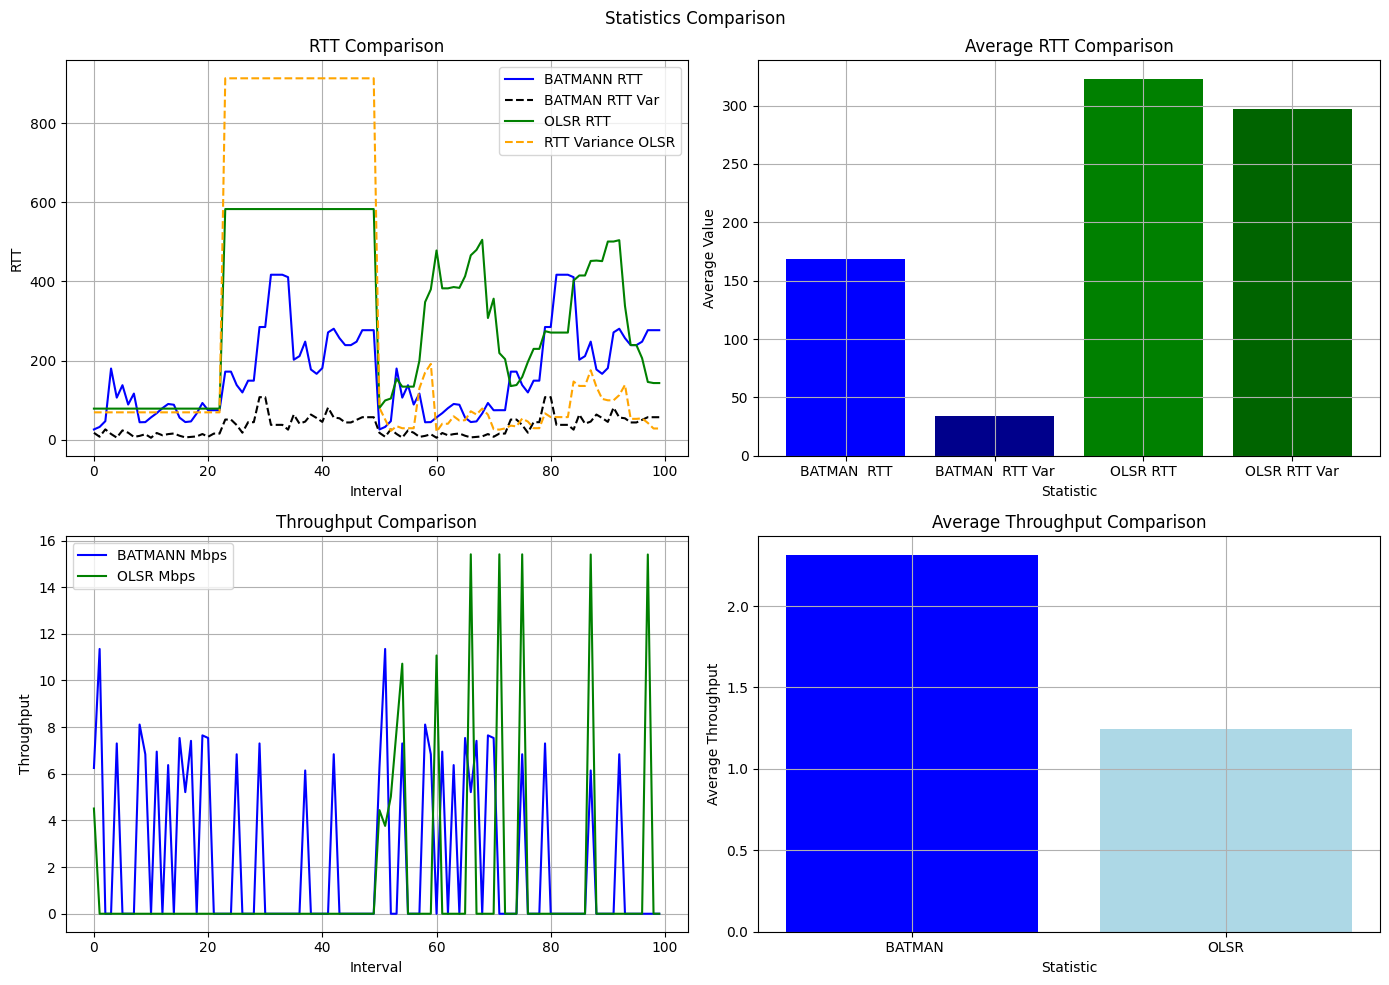

In [109]:
import matplotlib.pyplot as plt
import numpy as np

def plot_statistics(batman, olsr, title=''):
    # Unpack averages dictionary for batman
    bits_per_second_data_1 = batman['bits_per_second_data']
    # reverse_bits_per_second_data_1 = batman['reverse_bits_per_second_data']
    # turn bits per second to Mbps
    # bits_per_second_data_1 = [x/1000000 for x in bits_per_second_data_1]
    # reverse_bits_per_second_data_1 = [x/1000000 for x in reverse_bits_per_second_data_1]
    rtt_1 = batman['rtt']
    rtt_var_1 = batman['rtt_var']
    avg_bits_per_second_1 = batman['avg_bits_per_second']
    # avg_reverse_bits_per_second_1 = batman['avg_reverse_bits_per_second']
    avg_rtt_1 = batman['avg_rtt'] 
    avg_rtt_var_1 = batman['avg_rtt_var']

    # Unpack averages dictionary for olsr
    bits_per_second_data_2 = olsr['bits_per_second_data']
    # reverse_bits_per_second_data_2 = olsr['reverse_bits_per_second_data']
    rtt_2 = olsr['rtt']
    rtt_var_2 = olsr['rtt_var']
    avg_bits_per_second_2 = olsr['avg_bits_per_second']
    # avg_reverse_bits_per_second_2 = olsr['avg_reverse_bits_per_second']
    avg_rtt_2 = olsr['avg_rtt']
    avg_rtt_var_2 = olsr['avg_rtt_var']
    

    # Plotting
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(title)

    # Plot RTT Comparison
    axs[0, 0].plot(range(len(rtt_1)), rtt_1, label='BATMANN RTT', color='blue')
    axs[0, 0].plot(range(len(rtt_var_1)), rtt_var_1, label='BATMAN RTT Var', color='black', linestyle='--')
    axs[0, 0].plot(range(len(rtt_2)), rtt_2, label='OLSR RTT', color='green')
    axs[0, 0].plot(range(len(rtt_var_2)), rtt_var_2, label='RTT Variance OLSR', color='orange', linestyle='--')
    axs[0, 0].set_xlabel('Interval')
    axs[0, 0].set_ylabel('RTT')
    axs[0, 0].set_title('RTT Comparison')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # Plot Average RTT Comparison
    axs[0, 1].bar(['BATMAN  RTT', 'BATMAN  RTT Var', 'OLSR RTT', 'OLSR RTT Var'],
                  [avg_rtt_1, avg_rtt_var_1, avg_rtt_2, avg_rtt_var_2],
                  color=['blue', 'darkblue', 'green', 'darkgreen'])
    axs[0, 1].set_xlabel('Statistic')
    axs[0, 1].set_ylabel('Average Value')
    axs[0, 1].set_title('Average RTT Comparison')
    axs[0, 1].grid(True)

    # Plot Throughput Comparison
    axs[1, 0].plot(range(len(bits_per_second_data_1)), bits_per_second_data_1, label='BATMANN Mbps', color='blue',)
    # axs[1, 0].plot(range(len(reverse_bits_per_second_data_1)), reverse_bits_per_second_data_1, label='BATMAN Avg RTT Var', color='lightblue')
    axs[1, 0].plot(range(len(bits_per_second_data_2)), bits_per_second_data_2, label='OLSR Mbps', color='green')
    # axs[1, 0].plot(range(len(reverse_bits_per_second_data_2)), reverse_bits_per_second_data_2, label='RTT Variance OLSR', color='lightgreen')
    axs[1, 0].set_xlabel('Interval')
    axs[1, 0].set_ylabel('Throughput')
    axs[1, 0].set_title('Throughput Comparison')
    axs[1, 0].legend()
    axs[1, 0].grid(True)


    # Plot Average Throughput Comparison
    axs[1, 1].bar([' BATMAN', 
                  'OLSR'],
                 [avg_bits_per_second_1, 
                  avg_bits_per_second_2,],
                 color=['blue', 'lightblue', 'green', 'lightgreen'])
    axs[1, 1].set_xlabel('Statistic')
    axs[1, 1].set_ylabel('Average Throughput')
    axs[1, 1].set_title('Average Throughput Comparison')
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have already obtained the averages dictionaries using average_iperf_values function
# batman = average_iperf_values(batman)
# olsr = average_iperf_values([data3, data4])
plot_statistics(batman_averages, olsr_averages, title='Statistics Comparison')
